**Problem Statement: Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
os.getcwd()


'/content'

In [ ]:
!ls

sample_data


In [ ]:
os.chdir('/content/sample_data')

In [ ]:
df=pd.read_csv('NetflixIntro.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Data Preprocessing and Exploratory Analysis

In [ ]:
df['date_added']=pd.to_datetime(df['date_added'].str.strip(),format='%B %d, %Y')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [ ]:
temp2=df.isnull().sum().reset_index()
temp2.rename(columns={0:'count'},inplace=True)
temp2['percentage']=round(temp2['count']/len(df)*100,2)
temp2

,index,count,percentage
0,show_id,0,0.00
1,type,0,0.00
2,title,0,0.00
3,director,2634,29.91
4,cast,825,9.37
5,country,831,9.44
6,date_added,10,0.11
7,release_year,0,0.00
8,rating,4,0.05
9,duration,3,0.03


--> country,director,cast  and genre(s) column has coma seperated values so we will split and we will explode the columns independantly

--> to get the correct count of each possible combination.

In [ ]:
#country,director,cast  and genre(s) column has coma seperated values so we will split and we will explode the columns independantly
# to get the correct count of each possible combination
df0=df.copy()
df0['country']=df0['country'].str.split(',')
df0['director']=df0['director'].str.split(',')
df0['cast']=df0['cast'].str.split(',')
df0['listed_in']=df0['listed_in'].str.split(',')
df0.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...


In [ ]:
df0=df0.explode('country')
df0=df0.explode('director')
df0=df0.explode('cast')
df0=df0.explode('listed_in')
df0.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202065 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      151422 non-null  object        
 4   cast          199916 non-null  object        
 5   country       190168 non-null  object        
 6   date_added    201907 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        201998 non-null  object        
 9   duration      202062 non-null  object        
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 20.0+ MB


## **Country Column**

In [ ]:
df0['country'].value_counts()

,count
country,
United States,49868
India,22139
United Kingdom,9733
United States,9482
Japan,7317
...,...
Samoa,2
Sri Lanka,2
Kazakhstan,1


In [ ]:
temp=pd.DataFrame([])
print(df0['country'].nunique())
print(df0['country'].str.strip().nunique())
temp['country']=df0['country'].str.strip()
print(temp.nunique())

197
123
country    123
dtype: int64


In [ ]:
#So the country column has extra space value
df0['country']=df0['country'].str.strip()
df0['country']=df0['country'].str.upper()
df0['country'].value_counts()

,count
country,
UNITED STATES,59350
INDIA,22814
UNITED KINGDOM,12965
JAPAN,8679
FRANCE,8254
...,...
PANAMA,2
MONGOLIA,2
KAZAKHSTAN,1


In [ ]:
temp2=df0.isnull().sum().reset_index()
temp2.rename(columns={0:'count'},inplace=True)
temp2['percentage']=round(temp2['count']/len(df0)*100,2)
temp2

,index,count,percentage
0,show_id,0,0.00
1,type,0,0.00
2,title,0,0.00
3,director,50643,25.06
4,cast,2149,1.06
5,country,11897,5.89
6,date_added,158,0.08
7,release_year,0,0.00
8,rating,67,0.03
9,duration,3,0.00


In [ ]:
sorted(df0['country'][~df0['country'].isna()].unique())

['',
 'AFGHANISTAN',
 'ALBANIA',
 'ALGERIA',
 'ANGOLA',
 'ARGENTINA',
 'ARMENIA',
 'AUSTRALIA',
 'AUSTRIA',
 'AZERBAIJAN',
 'BAHAMAS',
 'BANGLADESH',
 'BELARUS',
 'BELGIUM',
 'BERMUDA',
 'BOTSWANA',
 'BRAZIL',
 'BULGARIA',
 'BURKINA FASO',
 'CAMBODIA',
 'CAMEROON',
 'CANADA',
 'CAYMAN ISLANDS',
 'CHILE',
 'CHINA',
 'COLOMBIA',
 'CROATIA',
 'CUBA',
 'CYPRUS',
 'CZECH REPUBLIC',
 'DENMARK',
 'DOMINICAN REPUBLIC',
 'EAST GERMANY',
 'ECUADOR',
 'EGYPT',
 'ETHIOPIA',
 'FINLAND',
 'FRANCE',
 'GEORGIA',
 'GERMANY',
 'GHANA',
 'GREECE',
 'GUATEMALA',
 'HONG KONG',
 'HUNGARY',
 'ICELAND',
 'INDIA',
 'INDONESIA',
 'IRAN',
 'IRAQ',
 'IRELAND',
 'ISRAEL',
 'ITALY',
 'JAMAICA',
 'JAPAN',
 'JORDAN',
 'KAZAKHSTAN',
 'KENYA',
 'KUWAIT',
 'LATVIA',
 'LEBANON',
 'LIECHTENSTEIN',
 'LITHUANIA',
 'LUXEMBOURG',
 'MALAWI',
 'MALAYSIA',
 'MALTA',
 'MAURITIUS',
 'MEXICO',
 'MONGOLIA',
 'MONTENEGRO',
 'MOROCCO',
 'MOZAMBIQUE',
 'NAMIBIA',
 'NEPAL',
 'NETHERLANDS',
 'NEW ZEALAND',
 'NICARAGUA',
 'NIGERIA',
 'NOR

In [ ]:
print(df0['country'].value_counts()<10)
print(sum(df0['country'].value_counts()<50))
print(sum(df0['country'].value_counts()<50)/df0['country'].nunique()*100)

print(sum(df0['country'].value_counts()<50)/df0['country'].nunique()*100)

country
UNITED STATES     False
INDIA             False
UNITED KINGDOM    False
JAPAN             False
FRANCE            False
                  ...  
PANAMA             True
MONGOLIA           True
KAZAKHSTAN         True
NICARAGUA          True
UGANDA             True
Name: count, Length: 123, dtype: bool
46
37.39837398373984
37.39837398373984


In [ ]:
#So the country column is cleaned and preprocessed
# for the missing values of  country column we are going to fill with unkown value as only 5% is missing of
df0['country'].isnull().sum()

11897

In [ ]:
df0['country']=df0['country'].fillna('Unknown')
df0['country'].value_counts()

,count
country,
UNITED STATES,59350
INDIA,22814
UNITED KINGDOM,12965
Unknown,11897
JAPAN,8679
...,...
PANAMA,2
MONGOLIA,2
KAZAKHSTAN,1


In [ ]:
df0['country'][df0['country']==""].head()

,country
193,
193,
193,
193,
193,


In [ ]:
df0['country'][df0['country']==""]='Unknown'
df0['country'].value_counts()

<ipython-input-23-1ea49bdf17db>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df0['country'][df0['country']==""]='Unknown'
<ipython-input-23-1ea49bdf17db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,count
country,
UNITED STATES,59350
INDIA,22814
UNITED KINGDOM,12965
Unknown,12003
JAPAN,8679
...,...
MONGOLIA,2
ARMENIA,2
KAZAKHSTAN,1


In [ ]:
df0['country'].value_counts().sum()

202065

In [ ]:
top10_countries=df0['country'].value_counts().reset_index()
top10_countries=top10_countries.iloc[:10]
top10_countries['Percentage']=round(top10_countries['count']/df0['country'].value_counts().sum()*100,2)
print(top10_countries.head(15))
top10_countries=list(top10_countries['country'])
top10_countries

          country  count  Percentage
0   UNITED STATES  59350       29.37
1           INDIA  22814       11.29
2  UNITED KINGDOM  12965        6.42
3         Unknown  12003        5.94
4           JAPAN   8679        4.30
5          FRANCE   8254        4.08
6          CANADA   7915        3.92
7           SPAIN   5315        2.63
8     SOUTH KOREA   5043        2.50
9         GERMANY   4383        2.17


['UNITED STATES',
 'INDIA',
 'UNITED KINGDOM',
 'Unknown',
 'JAPAN',
 'FRANCE',
 'CANADA',
 'SPAIN',
 'SOUTH KOREA',
 'GERMANY']

## **Rating column**

In [ ]:
df1=df0.copy()
df1.isnull().sum()

,0
show_id,0
type,0
title,0
director,50643
cast,2149
country,0
date_added,158
release_year,0
rating,67
duration,3


In [ ]:
round(df1.isnull().sum()/len(df1)*100,2)

,0
show_id,0.00
type,0.00
title,0.00
director,25.06
cast,1.06
country,0.00
date_added,0.08
release_year,0.00
rating,0.03
duration,0.00


In [ ]:
df1['rating'].value_counts()

,count
rating,
TV-MA,73915
TV-14,43957
R,25860
PG-13,16246
TV-PG,14926
PG,10919
TV-Y7,6304
TV-Y,3665
TV-G,2779


--> In our data set we have 3 incorect entries and 67 missing values for rating so we are going to drop as it is not even 0.03 percentage of the whole data as we will be majority looking on the data having high count  so as to recommend which to use for growth of bussiness

In [ ]:
df1[df1['rating'].isna()].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Oprah Winfrey,Unknown,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Ava DuVernay,Unknown,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,Kaito Ishikawa,JAPAN,2016-12-01,2013,NaN,1 Season,Anime Series,"After falling through a wormhole, a space-dwel..."
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,Kaito Ishikawa,JAPAN,2016-12-01,2013,NaN,1 Season,International TV Shows,"After falling through a wormhole, a space-dwel..."
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,Hisako Kanemoto,JAPAN,2016-12-01,2013,NaN,1 Season,Anime Series,"After falling through a wormhole, a space-dwel..."


In [ ]:
df1=df1.drop(df1[(df1['rating'].isna()) | (df1['rating'].isin(['74 min','84 min','66 min']))].index )
df1.shape

(201995, 12)

##    **Director Column**


In [ ]:
df2=df1.copy()
df2['director'].value_counts()

,count
director,
Martin Scorsese,419
Youssef Chahine,409
Cathy Garcia-Molina,356
Steven Spielberg,355
Lars von Trier,336
...,...
Reuben Atlas,1
Max Amini,1
Paul Miller,1


In [ ]:
temp2=df2.isnull().sum().reset_index()
temp2.rename(columns={0:'count'},inplace=True)
temp2['percentage']=round(temp2['count']/len(df2)*100,2)
temp2

,index,count,percentage
0,show_id,0,0.00
1,type,0,0.00
2,title,0,0.00
3,director,50583,25.04
4,cast,2149,1.06
5,country,0,0.00
6,date_added,158,0.08
7,release_year,0,0.00
8,rating,0,0.00
9,duration,0,0.00


In [ ]:
print(df2['director'].nunique())
print(df2['director'].str.strip().nunique())
temp=df2['director'].str.strip()
print(temp.str.upper().nunique())

5118
4991
4987


In [ ]:
#director column is also having extra space and case sensetive issue
df2['director']=df2['director'].str.strip()
df2['director']=df2['director'].str.upper()

In [ ]:
print(df2['director'].nunique())

4987


In [ ]:
temp=df2['director'].value_counts().reset_index()
temp['percentage']=round(temp['count']/df2['director'].nunique(),2)
temp

,director,count,percentage
0,MARTIN SCORSESE,419,0.08
1,YOUSSEF CHAHINE,409,0.08
2,CATHY GARCIA-MOLINA,356,0.07
3,STEVEN SPIELBERG,355,0.07
4,LARS VON TRIER,336,0.07
...,...,...,...
4982,MATT TYRNAUER,1,0.00
4983,RICHARD LADKANI,1,0.00
4984,PETER NICKS,1,0.00
4985,DANIEL J. CLARK,1,0.00


In [ ]:
round(sum(df2['director'].value_counts()<20)/(df2['director'].nunique())*100,2)

45.58

--> For the director missing values
1.   I am not using mode as there is no particular director who has directed even 1% of data supporting the assumption that these missing values were also directed by the mode director.

2.   so instead we will fill missing values with unkown value and I am not dropping these rows as they contribute to 25% of the data just to analyze the movie directed by a director


In [ ]:
df2['director']=df2['director'].fillna('Unknown')
df2.shape

(201995, 12)

In [ ]:
temp=df2['director'].value_counts().reset_index()
temp['percentage']=round(temp['count']/df2['director'].nunique(),2)
temp

,director,count,percentage
0,Unknown,50583,10.14
1,MARTIN SCORSESE,419,0.08
2,YOUSSEF CHAHINE,409,0.08
3,CATHY GARCIA-MOLINA,356,0.07
4,STEVEN SPIELBERG,355,0.07
...,...,...,...
4983,MATT TYRNAUER,1,0.00
4984,RICHARD LADKANI,1,0.00
4985,PETER NICKS,1,0.00
4986,DANIEL J. CLARK,1,0.00


In [ ]:
len(df2)

201995

In [ ]:
temp2=df2.isnull().sum().reset_index()
temp2.rename(columns={0:'count'},inplace=True)
temp2['percentage']=round(temp2['count']/len(df2)*100,2)
temp2

,index,count,percentage
0,show_id,0,0.00
1,type,0,0.00
2,title,0,0.00
3,director,0,0.00
4,cast,2149,1.06
5,country,0,0.00
6,date_added,158,0.08
7,release_year,0,0.00
8,rating,0,0.00
9,duration,0,0.00


## **Cast Column**

In [ ]:
df3=df2.copy()
temp=df3['cast'].value_counts().reset_index()
temp['percentage']=round(temp['count']/df3['cast'].nunique(),2)
temp

,cast,count,percentage
0,Alfred Molina,160,0.0
1,Salma Hayek,130,0.0
2,Frank Langella,128,0.0
3,John Rhys-Davies,125,0.0
4,John Krasinski,121,0.0
...,...,...,...
39279,Jonathan Kidder,1,0.0
39280,Diona Elise Burnett,1,0.0
39281,Taleia Gilliam,1,0.0
39282,Lyric Lewis,1,0.0


For the Cast missing values
1.   I am not using mode as there is no particular cast who has  even 1% of data supporting the assumption that these missing values were also casted by the mode .

2.   so instead we will drop missing values as they are not even 2% of the data








In [ ]:
print(df3.shape)
print(df3['cast'].nunique())
print(df3['cast'].str.strip().nunique())
temp=df3['cast'].str.strip()
print(temp.str.upper().nunique())

(201995, 12)
39284
36428
36416


In [ ]:
df3.dropna(subset=['cast'],inplace=True)


In [ ]:
print(df3.shape)
print(df3['cast'].nunique())
df3['cast']=df3['cast'].str.strip()
df3['cast']=df3['cast'].str.upper()
print(df3.shape)

(199846, 12)
39284
(199846, 12)


In [ ]:
df3['cast'].nunique()

36416

In [ ]:

temp=df3['cast'].value_counts().reset_index()
temp['percentage']=round(temp['count']/df3['cast'].nunique(),2)
temp

,cast,count,percentage
0,LIAM NEESON,161,0.0
1,ALFRED MOLINA,160,0.0
2,JOHN KRASINSKI,139,0.0
3,SALMA HAYEK,130,0.0
4,FRANK LANGELLA,128,0.0
...,...,...,...
36411,VALERIE AREM,1,0.0
36412,COLLEEN FOY,1,0.0
36413,JOE SANFELIPPO,1,0.0
36414,LINDSEY AMES,1,0.0


In [ ]:
df3.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,KHOSI NGEMA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,KHOSI NGEMA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."


In [ ]:
temp2=df3.isnull().sum().reset_index()
temp2.rename(columns={0:'count'},inplace=True)
temp2['percentage']=round(temp2['count']/len(df3)*100,2)
temp2

,index,count,percentage
0,show_id,0,0.00
1,type,0,0.00
2,title,0,0.00
3,director,0,0.00
4,cast,0,0.00
5,country,0,0.00
6,date_added,158,0.08
7,release_year,0,0.00
8,rating,0,0.00
9,duration,0,0.00


## **Date_added Column**

In [ ]:
df4=df3.copy()
df4.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,KHOSI NGEMA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,KHOSI NGEMA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."


In [ ]:
temp=df3['date_added'].value_counts().reset_index()
temp['percentage']=round(temp['count']/df3['date_added'].nunique(),2)
temp

,date_added,count,percentage
0,2020-01-01,3733,2.24
1,2019-11-01,2252,1.35
2,2021-07-01,2217,1.33
3,2017-10-01,1876,1.13
4,2021-09-01,1754,1.05
...,...,...,...
1658,2016-02-19,1,0.00
1659,2016-01-08,1,0.00
1660,2019-03-26,1,0.00
1661,2019-10-14,1,0.00


In [ ]:
df4['date_added'].describe()

,date_added
count,199688
mean,2019-06-21 03:09:59.687512576
min,2008-01-01 00:00:00
25%,2018-06-30 00:00:00
50%,2019-09-09 00:00:00
75%,2020-09-10 00:00:00
max,2021-09-24 00:00:00


For the Cast missing values
1.   I am not using mode as there is no particular date who has large percentage of data supporting the assumption that these missing values were also have the same date
2.   so instead we will drop missing values as they are not even 1% of the data








In [ ]:
df4.dropna(subset=['date_added'],inplace=True)

## **Release Year Exploratay Analysis**

In [ ]:
df5=df4.copy()
df5.describe()

,date_added,release_year
count,199688,199688.000000
mean,2019-06-21 03:09:59.687512320,2013.417757
min,2008-01-01 00:00:00,1942.000000
25%,2018-06-30 00:00:00,2012.000000
50%,2019-09-09 00:00:00,2016.000000
75%,2020-09-10 00:00:00,2019.000000
max,2021-09-24 00:00:00,2021.000000
std,NaN,9.018455


In [ ]:
temp=df5['release_year'].value_counts().reset_index()
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   release_year  72 non-null     int64
 1   count         72 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


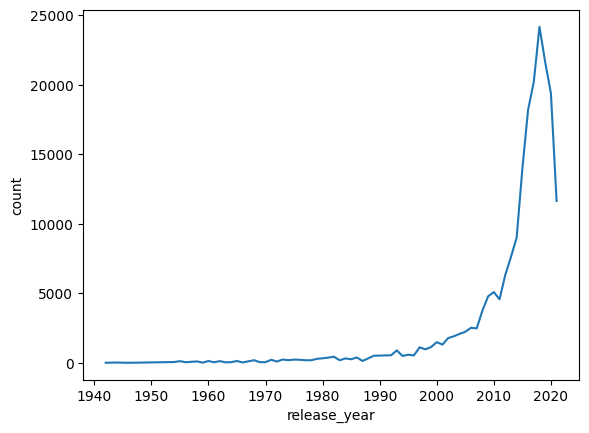

In [ ]:
sns.lineplot(data=temp,x='release_year',y='count')
plt.show()

In [ ]:
df5.reset_index(inplace=True,drop=True)
df5.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown,KHOSI NGEMA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown,KHOSI NGEMA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df5['Year_added']=df5['date_added'].dt.year
df5[df5['release_year']>df5['Year_added']]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added
37281,s1552,TV Show,Hilda,Unknown,BELLA RAMSEY,UNITED KINGDOM,2020-12-14,2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend...",2020
37282,s1552,TV Show,Hilda,Unknown,AMEERAH FALZON-OJO,UNITED KINGDOM,2020-12-14,2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend...",2020
37283,s1552,TV Show,Hilda,Unknown,OLIVER NELSON,UNITED KINGDOM,2020-12-14,2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend...",2020
37284,s1552,TV Show,Hilda,Unknown,DAISY HAGGARD,UNITED KINGDOM,2020-12-14,2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend...",2020
37285,s1552,TV Show,Hilda,Unknown,RASMUS HARDIKER,UNITED KINGDOM,2020-12-14,2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend...",2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159905,s7113,TV Show,Jack Taylor,STUART ORME,TARA BREATHNACH,IRELAND,2013-03-31,2016,TV-MA,1 Season,International TV Shows,Ken Bruen's bestselling crime novels leap to l...,2013
159906,s7113,TV Show,Jack Taylor,STUART ORME,TARA BREATHNACH,IRELAND,2013-03-31,2016,TV-MA,1 Season,TV Dramas,Ken Bruen's bestselling crime novels leap to l...,2013
159907,s7113,TV Show,Jack Taylor,STUART ORME,FRANK O'SULLIVAN,IRELAND,2013-03-31,2016,TV-MA,1 Season,Crime TV Shows,Ken Bruen's bestselling crime novels leap to l...,2013
159908,s7113,TV Show,Jack Taylor,STUART ORME,FRANK O'SULLIVAN,IRELAND,2013-03-31,2016,TV-MA,1 Season,International TV Shows,Ken Bruen's bestselling crime novels leap to l...,2013


--> Outlier Detected movie or tv show getting added before even it was released.

--> so we will remove all these rows

In [ ]:
df5.shape

(199688, 13)

In [ ]:
df5.drop(df5[df5['release_year']>df5['Year_added']].index,inplace=True)
df5.shape

(199406, 13)

In [ ]:
df5.drop(columns=['Year_added'],inplace=True)
df5.shape

(199406, 12)

In [ ]:
df5.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown,KHOSI NGEMA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown,KHOSI NGEMA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."


## **Listed_in Column**

In [ ]:
df6=df5.copy()
print(df6.shape)
print(df6['listed_in'].nunique())
print(df6['listed_in'].str.strip().nunique())
temp=df6['listed_in'].str.strip()
print(temp.str.upper().nunique())

(199406, 12)
73
42
42


In [ ]:
print(df6.shape)
df6.head()


(199406, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown,KHOSI NGEMA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown,KHOSI NGEMA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df6['listed_in']=df6['listed_in'].str.strip()
df6['listed_in']=df6['listed_in'].str.upper()
df6['listed_in'].value_counts().reset_index()

,listed_in,count
0,DRAMAS,29786
1,INTERNATIONAL MOVIES,27908
2,COMEDIES,20814
3,INTERNATIONAL TV SHOWS,12652
4,ACTION & ADVENTURE,12186
5,INDEPENDENT MOVIES,9831
6,CHILDREN & FAMILY MOVIES,9728
7,TV DRAMAS,8877
8,THRILLERS,7107
9,ROMANTIC MOVIES,6405


In [ ]:
df6.groupby(['type','listed_in'])['show_id'].count()

type     listed_in                   
Movie    ACTION & ADVENTURE              12186
         ANIME FEATURES                   1033
         CHILDREN & FAMILY MOVIES         9728
         CLASSIC MOVIES                   1436
         COMEDIES                        20814
         CULT MOVIES                      1076
         DOCUMENTARIES                    1713
         DRAMAS                          29786
         FAITH & SPIRITUALITY              713
         HORROR MOVIES                    4567
         INDEPENDENT MOVIES               9831
         INTERNATIONAL MOVIES            27908
         LGBTQ MOVIES                      816
         MOVIES                            402
         MUSIC & MUSICALS                 3024
         ROMANTIC MOVIES                  6405
         SCI-FI & FANTASY                 4004
         SPORTS MOVIES                    1446
         STAND-UP COMEDY                   538
         THRILLERS                        7107
TV Show  ANIME SERIES                     2270
         BRITISH TV SHOWS                 1750
         CLASSIC & CULT TV                 260
         CRIME TV SHOWS                   4598
         DOCUSERIES                        574
         INTERNATIONAL TV SHOWS          12652
         KIDS' TV                         4464
         KOREAN TV SHOWS                  1118
         REALITY TV                        638
         ROMANTIC TV SHOWS                3025
         SCIENCE & NATURE TV               117
         SPANISH-LANGUAGE TV SHOWS        2100
         STAND-UP COMEDY & TALK SHOWS      261
         TEEN TV SHOWS                     739
         TV ACTION & ADVENTURE            2275
         TV COMEDIES                      4839
         TV DRAMAS                        8877
         TV HORROR                         937
         TV MYSTERIES                     1256
         TV SCI-FI & FANTASY              1031
         TV SHOWS                          328
         TV THRILLERS                      764
Name: show_id, dtype: int64

To ensure clarity and consistency in genre classification, we will standardize similar genres into broader categories.


1. Unify Anime Genres:

  - Replace "Anime Feature" and "Anime Series" with "Anime" since the Type column already differentiates between movies and TV Show.

2. Merge Similar Columns:

  - Combine "ACTION & ADVENTURE"  and "TV ACTION & ADVENTURE" into "Action & Adventure".

  - Group "Comedies" into "Comedy".

  - Standardize "Documentary" genres.

  - Merge "Romantic" and "Dramas" into "Romance & Drama".

  - Consolidate "Horror" into a single "Horror" category.

  - Merge "Sci-Fi" and "Fantasy" into "Sci-Fi & Fantasy".

  - Group "Thriller" genres into "Thriller".
  





In [ ]:
df6['listed_in'][(df6['listed_in']=='ACTION & ADVENTURE') |(df6['listed_in']=='TV ACTION & ADVENTURE')]='ACTION & ADVENTURE'
df6['listed_in'][(df6['listed_in']=='ANIME FEATURES') |(df6['listed_in']=='ANIME SERIES')]='ANIME'
df6['listed_in'][(df6['listed_in']=='TV SCI-FI & FANTASY') |(df6['listed_in']=='SCI-FI & FANTASY')]='SCI-FI & FANTASY'
df6['listed_in'][(df6['listed_in']=='TV COMEDIES') |(df6['listed_in']=='COMEDIES')]='COMEDIES'
df6['listed_in'][(df6['listed_in']=='TV DRAMAS') |(df6['listed_in']=='DRAMAS')]='DRAMAS'
df6['listed_in'][(df6['listed_in']=='TV THRILLERS') |(df6['listed_in']=='THRILLERS')]='THRILLERS'
df6['listed_in'][(df6['listed_in']=='TV HORROR') |(df6['listed_in']=='HORROR MOVIES')]='HORROR'
df6['listed_in'][(df6['listed_in']=='DOCUSERIES') |(df6['listed_in']=='DOCUMENTARIES')]='DOCUMENTARY'
df6['listed_in'][(df6['listed_in']=='ROMANTIC TV SHOWS') |(df6['listed_in']=='ROMANTIC MOVIES')]='ROMANTIC'

<ipython-input-67-2e34fc639c8a>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df6['listed_in'][(df6['listed_in']=='ACTION & ADVENTURE') |(df6['listed_in']=='TV ACTION & ADVENTURE')]='ACTION & ADVENTURE'
<ipython-input-67-2e34fc639c8a>:1: 

In [ ]:
df6['listed_in'].value_counts().reset_index()

,listed_in,count
0,DRAMAS,38663
1,INTERNATIONAL MOVIES,27908
2,COMEDIES,25653
3,ACTION & ADVENTURE,14461
4,INTERNATIONAL TV SHOWS,12652
5,INDEPENDENT MOVIES,9831
6,CHILDREN & FAMILY MOVIES,9728
7,ROMANTIC,9430
8,THRILLERS,7871
9,HORROR,5504


In [ ]:
df6.groupby(['type','listed_in'])['show_id'].count()

type     listed_in                   
Movie    ACTION & ADVENTURE              12186
         ANIME                            1033
         CHILDREN & FAMILY MOVIES         9728
         CLASSIC MOVIES                   1436
         COMEDIES                        20814
         CULT MOVIES                      1076
         DOCUMENTARY                      1713
         DRAMAS                          29786
         FAITH & SPIRITUALITY              713
         HORROR                           4567
         INDEPENDENT MOVIES               9831
         INTERNATIONAL MOVIES            27908
         LGBTQ MOVIES                      816
         MOVIES                            402
         MUSIC & MUSICALS                 3024
         ROMANTIC                         6405
         SCI-FI & FANTASY                 4004
         SPORTS MOVIES                    1446
         STAND-UP COMEDY                   538
         THRILLERS                        7107
TV Show  ACTION & ADVENTURE               2275
         ANIME                            2270
         BRITISH TV SHOWS                 1750
         CLASSIC & CULT TV                 260
         COMEDIES                         4839
         CRIME TV SHOWS                   4598
         DOCUMENTARY                       574
         DRAMAS                           8877
         HORROR                            937
         INTERNATIONAL TV SHOWS          12652
         KIDS' TV                         4464
         KOREAN TV SHOWS                  1118
         REALITY TV                        638
         ROMANTIC                         3025
         SCI-FI & FANTASY                 1031
         SCIENCE & NATURE TV               117
         SPANISH-LANGUAGE TV SHOWS        2100
         STAND-UP COMEDY & TALK SHOWS      261
         TEEN TV SHOWS                     739
         THRILLERS                         764
         TV MYSTERIES                     1256
         TV SHOWS                          328
Name: show_id, dtype: int64

In [ ]:
df6.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
df6.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,INTERNATIONAL TV SHOWS,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,DRAMAS,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,TV MYSTERIES,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown,KHOSI NGEMA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,INTERNATIONAL TV SHOWS,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown,KHOSI NGEMA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 Seasons,DRAMAS,"After crossing paths at a party, a Cape Town t..."


## **Duration Column**

In [ ]:
df7=df6.copy()
df7.describe()

,date_added,release_year
count,199406,199406.000000
mean,2019-06-21 20:02:10.563774464,2013.410258
min,2008-01-01 00:00:00,1942.000000
25%,2018-06-30 00:00:00,2012.000000
50%,2019-09-09 00:00:00,2016.000000
75%,2020-09-11 00:00:00,2019.000000
max,2021-09-24 00:00:00,2021.000000
std,NaN,9.022423


In [ ]:
df7['duration']=df7['duration'].str.strip()
df7['duration']=df7['duration'].str.upper()
print(df7['duration'].unique())
print(df7['duration'].nunique())

['2 SEASONS' '1 SEASON' '91 MIN' '125 MIN' '9 SEASONS' '104 MIN' '127 MIN'
 '4 SEASONS' '94 MIN' '5 SEASONS' '161 MIN' '61 MIN' '166 MIN' '147 MIN'
 '103 MIN' '97 MIN' '106 MIN' '111 MIN' '3 SEASONS' '110 MIN' '105 MIN'
 '96 MIN' '124 MIN' '116 MIN' '98 MIN' '115 MIN' '122 MIN' '99 MIN'
 '88 MIN' '100 MIN' '6 SEASONS' '102 MIN' '93 MIN' '95 MIN' '85 MIN'
 '83 MIN' '113 MIN' '13 MIN' '182 MIN' '48 MIN' '145 MIN' '87 MIN'
 '90 MIN' '117 MIN' '128 MIN' '119 MIN' '143 MIN' '114 MIN' '118 MIN'
 '108 MIN' '63 MIN' '121 MIN' '142 MIN' '154 MIN' '120 MIN' '82 MIN'
 '109 MIN' '101 MIN' '86 MIN' '229 MIN' '76 MIN' '89 MIN' '156 MIN'
 '112 MIN' '107 MIN' '129 MIN' '92 MIN' '135 MIN' '136 MIN' '165 MIN'
 '150 MIN' '133 MIN' '84 MIN' '140 MIN' '7 SEASONS' '64 MIN' '59 MIN'
 '139 MIN' '148 MIN' '189 MIN' '141 MIN' '130 MIN' '138 MIN' '132 MIN'
 '10 SEASONS' '123 MIN' '65 MIN' '68 MIN' '67 MIN' '66 MIN' '62 MIN'
 '69 MIN' '70 MIN' '74 MIN' '131 MIN' '39 MIN' '46 MIN' '8 SEASONS'
 '17 SEASONS' '126 MI

In [ ]:
df_grp_duration=df7.groupby(['type','duration'])['show_id'].count().reset_index()
df_grp_duration[df_grp_duration['type']=='TV Show']

,type,duration,show_id
201,TV Show,1 SEASON,34219
202,TV Show,10 SEASONS,208
203,TV Show,11 SEASONS,18
204,TV Show,12 SEASONS,111
205,TV Show,13 SEASONS,102
206,TV Show,15 SEASONS,96
207,TV Show,17 SEASONS,30
208,TV Show,2 SEASONS,9269
209,TV Show,3 SEASONS,5021
210,TV Show,4 SEASONS,2120


In [ ]:
print(sorted(df7['duration'][df7['duration'].str.contains('SEASON')].unique()))
print(df7['duration'][df7['duration'].str.contains('SEASON')].nunique())
#no duplicate values

['1 SEASON', '10 SEASONS', '11 SEASONS', '12 SEASONS', '13 SEASONS', '15 SEASONS', '17 SEASONS', '2 SEASONS', '3 SEASONS', '4 SEASONS', '5 SEASONS', '6 SEASONS', '7 SEASONS', '8 SEASONS', '9 SEASONS']
15


In [ ]:
print(df7['duration'][df7['duration'].str.contains('MIN')].unique())
print(df7['duration'][df7['duration'].str.contains('MIN')].nunique())

['91 MIN' '125 MIN' '104 MIN' '127 MIN' '94 MIN' '161 MIN' '61 MIN'
 '166 MIN' '147 MIN' '103 MIN' '97 MIN' '106 MIN' '111 MIN' '110 MIN'
 '105 MIN' '96 MIN' '124 MIN' '116 MIN' '98 MIN' '115 MIN' '122 MIN'
 '99 MIN' '88 MIN' '100 MIN' '102 MIN' '93 MIN' '95 MIN' '85 MIN' '83 MIN'
 '113 MIN' '13 MIN' '182 MIN' '48 MIN' '145 MIN' '87 MIN' '90 MIN'
 '117 MIN' '128 MIN' '119 MIN' '143 MIN' '114 MIN' '118 MIN' '108 MIN'
 '63 MIN' '121 MIN' '142 MIN' '154 MIN' '120 MIN' '82 MIN' '109 MIN'
 '101 MIN' '86 MIN' '229 MIN' '76 MIN' '89 MIN' '156 MIN' '112 MIN'
 '107 MIN' '129 MIN' '92 MIN' '135 MIN' '136 MIN' '165 MIN' '150 MIN'
 '133 MIN' '84 MIN' '140 MIN' '64 MIN' '59 MIN' '139 MIN' '148 MIN'
 '189 MIN' '141 MIN' '130 MIN' '138 MIN' '132 MIN' '123 MIN' '65 MIN'
 '68 MIN' '67 MIN' '66 MIN' '62 MIN' '69 MIN' '70 MIN' '74 MIN' '131 MIN'
 '39 MIN' '46 MIN' '126 MIN' '155 MIN' '159 MIN' '137 MIN' '12 MIN'
 '273 MIN' '36 MIN' '34 MIN' '77 MIN' '49 MIN' '72 MIN' '78 MIN' '204 MIN'
 '212 MIN' '25 MIN

### Movies

In [ ]:
duration_list_min=df7[['duration','country','show_id']][df7['duration'].str.contains('MIN')].reset_index(drop=True)
duration_list_min['duration']=duration_list_min['duration'].str.replace('MIN','',regex=True).astype(int)
duration_list_min
#no duplicate values

,duration,country,show_id
0,91,Unknown,s7
1,91,Unknown,s7
2,91,Unknown,s7
3,91,Unknown,s7
4,91,Unknown,s7
...,...,...,...
144528,111,INDIA,s8807
144529,111,INDIA,s8807
144530,111,INDIA,s8807
144531,111,INDIA,s8807


In [ ]:
duration_list_min=duration_list_min.drop_duplicates(subset=['show_id','country'])

In [ ]:
duration_list_min.describe()

,duration
count,7181.000000
mean,102.145662
std,26.686918
min,8.000000
25%,89.000000
50%,100.000000
75%,116.000000
max,312.000000


In [ ]:
duration_list_min=duration_list_min[duration_list_min['country'].isin(top10_countries)]
duration_list_min['country'].value_counts()


,count
country,
UNITED STATES,2491
INDIA,942
UNITED KINGDOM,476
Unknown,378
CANADA,295
FRANCE,285
GERMANY,168
SPAIN,156
JAPAN,114


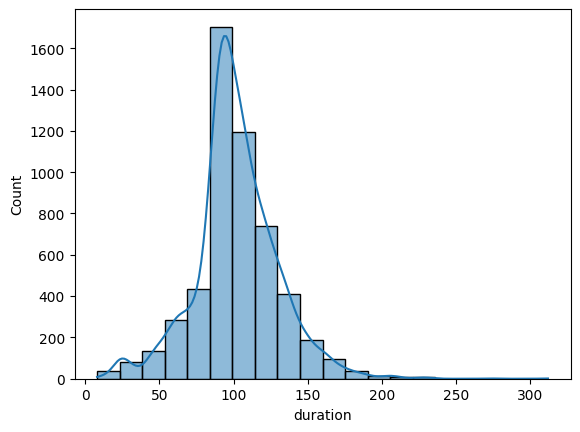

In [ ]:
sns.histplot(data=duration_list_min,x='duration',bins=20,kde=True)
plt.show()


<ipython-input-82-d4c65baa3757>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=(-.35,-0.1))


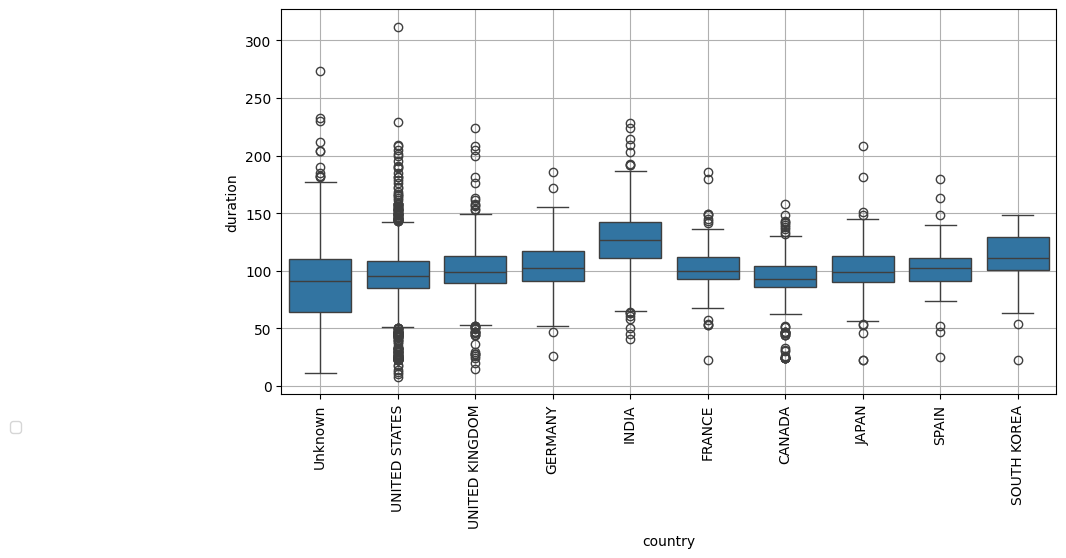

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=duration_list_min,y='duration',x='country')
plt.legend(loc=(-.35,-0.1))
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
duration_list_min[duration_list_min['country']=='INDIA'].describe()

,duration
count,942.000000
mean,126.983015
std,24.695031
min,41.000000
25%,111.000000
50%,127.000000
75%,142.000000
max,228.000000


Based on the analysis of movie durations across different countries, the global average movie duration is 101 minutes, which closely aligns with the median, indicating a balanced distribution. The interquartile range (IQR) lies between 88 minutes and 117 minutes, suggesting that most movies fall within this duration range. Additionally, the distribution of movie durations appears to be normal for the majority of countries.

However, in India, there is a distinct preference for longer movies. The average duration is 127 minutes, significantly higher than the global average, with an IQR ranging from 111 minutes to 142 minutes. This indicates that Indian audiences generally favor extended runtimes compared to other regions.

Furthermore, the count of movies produced per country highlights key markets, with the United States leading at 2,491 movies, followed by India (942), the United Kingdom (476), Canada (295), and France (285).

**Recommendation for Netflix**
1. Global Market Strategy: Since most countries have a preference for movies around 101 minutes, Netflix should continue producing content that falls within this standard range to cater to a broad international audience.

2. India-Specific Strategy: Given India's preference for longer movies, Netflix should consider producing longer-duration films (120–140 minutes) specifically tailored to this audience to enhance engagement and viewership.

### TV Show

In [ ]:
duration_list_season=df7[['duration','country','show_id']][df7['duration'].str.contains('SEASON')].reset_index(drop=True)
duration_list_season=duration_list_season.drop_duplicates(subset=['show_id','country','duration'])
duration_list_season=duration_list_season[duration_list_season['country'].isin(top10_countries)]
duration_list_season['duration'].value_counts()

,count
duration,
1 SEASON,1228
2 SEASONS,345
3 SEASONS,174
4 SEASONS,101
5 SEASONS,67
6 SEASONS,32
7 SEASONS,23
8 SEASONS,16
9 SEASONS,9


In [ ]:
duration_list_season['country'].value_counts()

,count
country,
UNITED STATES,772
Unknown,302
UNITED KINGDOM,231
JAPAN,192
SOUTH KOREA,168
CANADA,116
FRANCE,75
INDIA,65
SPAIN,53


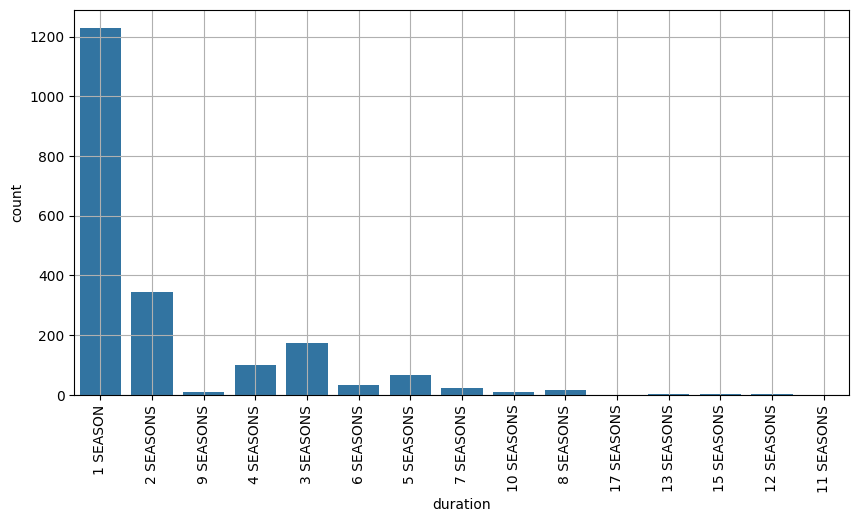

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=duration_list_season,x='duration')
plt.grid()
plt.xticks(rotation=90)
plt.show()


In [ ]:
duration_list_season_cross_tab=pd.crosstab(duration_list_season['country'],duration_list_season['duration'])
duration_list_season_cross_tab[sorted(duration_list_season_cross_tab.columns)]

duration,1 SEASON,10 SEASONS,11 SEASONS,12 SEASONS,13 SEASONS,15 SEASONS,17 SEASONS,2 SEASONS,3 SEASONS,4 SEASONS,5 SEASONS,6 SEASONS,7 SEASONS,8 SEASONS,9 SEASONS
country,,,,,,,,,,,,,,,
CANADA,39,2,0,2,1,1,0,32,16,8,9,3,2,1,0
FRANCE,44,0,0,0,0,0,0,15,8,6,1,0,1,0,0
GERMANY,27,0,0,0,0,0,0,7,4,1,0,0,0,0,0
INDIA,57,0,0,0,0,0,0,3,4,1,0,0,0,0,0
JAPAN,124,0,0,0,0,0,0,47,10,3,4,3,0,0,1
SOUTH KOREA,141,0,0,0,0,0,0,18,7,0,1,1,0,0,0
SPAIN,30,0,0,0,0,0,0,11,5,4,2,1,0,0,0
UNITED KINGDOM,132,2,0,0,0,0,0,44,21,14,12,3,0,0,3
UNITED STATES,379,4,1,1,1,2,1,136,90,62,37,21,19,14,4


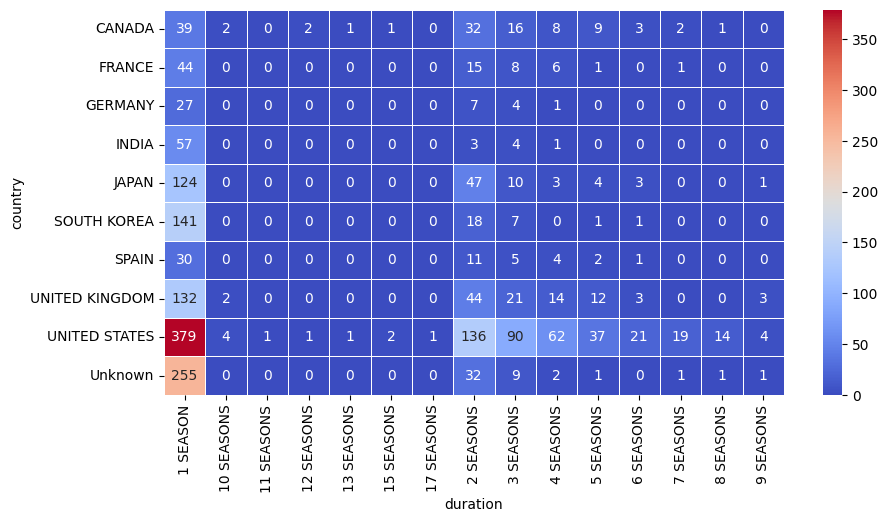

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(duration_list_season_cross_tab,cmap='coolwarm',annot=True,fmt='.0f', linewidths=0.5)
plt.show()

The analysis of TV show durations indicates that the majority of series consist of only one season, with the number of shows decreasing as the number of seasons increases. The distribution is as follows:
- 1-season shows dominate with 1,228 series, followed by 2-season shows (345), 3-season shows (174), and 4-season shows (101).
- The number of series continues to decline with increasing seasons, with only 8 series reaching 10 seasons, 3 series reaching 15 seasons, and just 1 series extending to 17 seasons.

**Country-Wise TV Show Distribution**

- United States: Leads in multi-season productions, with 379 one-season shows and a significant number of long-running series, including 4 shows with 10 seasons, 1 show with 17 seasons, and multiple series exceeding 6 seasons.
- United Kingdom & Canada: Feature a moderate number of long-running series, with 2 UK shows and 2 Canadian shows reaching 10 seasons. However, both countries primarily focus on shorter series, with 132 and 39 one-season shows, respectively.
- Japan & South Korea: Have a strong presence of one-season series (124 and 141, respectively), with relatively fewer multi-season shows.
- India, France, Germany, and Spain: These regions predominantly produce short-duration series, mostly limited to one or two seasons.
- Unknown Origin: A notable number of TV shows (255) fall under the "Unknown" category, mainly comprising one-season series.

**Recommendations for Netflix**

1. Focus on One-Season Shows Globally: Since most TV shows have a single season, Netflix should continue investing in limited-series formats, ensuring high-quality storytelling that can engage audiences within a shorter time span.


2. Country-Specific Strategies:
- United States & United Kingdom: Since these regions have a substantial number of multi-season shows, Netflix should consider producing more long-running series here.
- Japan & South Korea: Given the high number of one-season shows, Netflix should prioritize short-format storytelling,.
- India, France, Germany, and Spain: These markets favor shorter series, making them ideal for Netflix to focus on mini-series .
- Canada: While primarily producing short-season shows, Canada also has a few long-running series. Netflix can explore both limited and multi-season formats based on audience engagement trends.

3. Balancing Multi-Season Content: While most TV shows have short durations, certain markets (especially the U.S.) show demand for long-form storytelling. Netflix should invest in high-quality, multi-season narratives .

# Visualization and EDA

In [ ]:
df7.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
df7[df7.duplicated(subset=['show_id','country'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 SEASONS,DRAMAS,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 SEASONS,TV MYSTERIES,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown,KHOSI NGEMA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 SEASONS,INTERNATIONAL TV SHOWS,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown,KHOSI NGEMA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 SEASONS,DRAMAS,"After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,Unknown,KHOSI NGEMA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 SEASONS,TV MYSTERIES,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
199683,s8807,Movie,Zubaan,MOZEZ SINGH,ANITA SHABDISH,INDIA,2019-03-02,2015,TV-14,111 MIN,INTERNATIONAL MOVIES,A scrappy but poor boy worms his way into a ty...
199684,s8807,Movie,Zubaan,MOZEZ SINGH,ANITA SHABDISH,INDIA,2019-03-02,2015,TV-14,111 MIN,MUSIC & MUSICALS,A scrappy but poor boy worms his way into a ty...
199685,s8807,Movie,Zubaan,MOZEZ SINGH,CHITTARANJAN TRIPATHY,INDIA,2019-03-02,2015,TV-14,111 MIN,DRAMAS,A scrappy but poor boy worms his way into a ty...
199686,s8807,Movie,Zubaan,MOZEZ SINGH,CHITTARANJAN TRIPATHY,INDIA,2019-03-02,2015,TV-14,111 MIN,INTERNATIONAL MOVIES,A scrappy but poor boy worms his way into a ty...


## 1. Rating column

In [ ]:
df7_unique=df7.drop_duplicates(subset=['show_id','country'])
print(df7.shape)
print(df7_unique.shape)
temp=df7_unique['country'].value_counts().reset_index()
temp['percentage']=round(temp['count']/df7_unique['country'].nunique(),2)
print(temp.head(20))
temp=temp.loc[:7,['country']]

list_of_countries_to_be_considered=list(temp['country'])
list_of_countries_to_be_considered

(199406, 12)
(9803, 12)
           country  count  percentage
0    UNITED STATES   3263       28.13
1            INDIA   1007        8.68
2   UNITED KINGDOM    707        6.09
3          Unknown    680        5.86
4           CANADA    411        3.54
5           FRANCE    360        3.10
6            JAPAN    306        2.64
7      SOUTH KOREA    227        1.96
8            SPAIN    209        1.80
9          GERMANY    207        1.78
10           CHINA    156        1.34
11          MEXICO    152        1.31
12       AUSTRALIA    141        1.22
13           EGYPT    115        0.99
14          TURKEY    113        0.97
15       HONG KONG    105        0.91
16         NIGERIA    101        0.87
17          TAIWAN     89        0.77
18       INDONESIA     88        0.76
19          BRAZIL     85        0.73


['UNITED STATES',
 'INDIA',
 'UNITED KINGDOM',
 'Unknown',
 'CANADA',
 'FRANCE',
 'JAPAN',
 'SOUTH KOREA']

In [ ]:
# we will use only first7 as they atleast contribute more than 1% percent of data
rating_counts=df7_unique.groupby(['country','rating'])['show_id'].count().reset_index().sort_values(by='show_id',ascending=False)
rating_counts

,country,rating,show_id
465,UNITED STATES,TV-MA,914
462,UNITED STATES,R,652
186,INDIA,TV-14,562
461,UNITED STATES,PG-13,423
463,UNITED STATES,TV-14,393
...,...,...,...
259,LUXEMBOURG,PG,1
262,LUXEMBOURG,TV-14,1
264,LUXEMBOURG,TV-PG,1
265,LUXEMBOURG,TV-Y7,1


In [ ]:
rating_counts=rating_counts.loc[rating_counts['country'].isin(list_of_countries_to_be_considered)]

In [ ]:
df7_unique_temp=df7_unique[df7_unique['country'].isin(list_of_countries_to_be_considered)]
df7_unique_temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
57,s3,TV Show,Ganglands,JULIEN LECLERCQ,SAMI BOUAJILA,Unknown,2021-09-24,2021,TV-MA,1 SEASON,CRIME TV SHOWS,To protect his family from a powerful drug lor...
84,s5,TV Show,Kota Factory,Unknown,MAYUR MORE,INDIA,2021-09-24,2021,TV-MA,2 SEASONS,INTERNATIONAL TV SHOWS,In a city of coaching centers known to train I...
108,s6,TV Show,Midnight Mass,MIKE FLANAGAN,KATE SIEGEL,Unknown,2021-09-24,2021,TV-MA,1 SEASON,DRAMAS,The arrival of a charismatic young priest brin...
156,s7,Movie,My Little Pony: A New Generation,ROBERT CULLEN,VANESSA HUDGENS,Unknown,2021-09-24,2021,PG,91 MIN,CHILDREN & FAMILY MOVIES,Equestria's divided. But a bright-eyed hero be...
176,s8,Movie,Sankofa,HAILE GERIMA,KOFI GHANABA,UNITED STATES,2021-09-24,1993,TV-MA,125 MIN,DRAMAS,"On a photo shoot in Ghana, an American model s..."


In [ ]:
df7_unique_temp['country'].value_counts()

,count
country,
UNITED STATES,3263
INDIA,1007
UNITED KINGDOM,707
Unknown,680
CANADA,411
FRANCE,360
JAPAN,306
SOUTH KOREA,227


In [ ]:
pd.crosstab(df7_unique_temp['country'],df7_unique_temp['rating'])

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
country,,,,,,,,,,,,,,
CANADA,2,1,4,33,32,79,36,16,98,32,43,34,1,0
FRANCE,2,1,3,21,34,57,38,2,154,10,16,20,0,2
INDIA,0,0,6,7,11,5,562,6,254,135,5,15,1,0
JAPAN,1,0,0,11,9,9,94,2,99,49,2,30,0,0
SOUTH KOREA,1,0,3,2,1,2,86,1,91,19,9,12,0,0
UNITED KINGDOM,4,0,8,35,80,144,74,20,216,81,33,11,0,1
UNITED STATES,38,1,30,239,423,652,393,77,914,232,117,144,2,1
Unknown,0,0,0,4,7,11,199,25,225,64,58,87,0,0


<ipython-input-97-536b8714953e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_counts.rename(columns={'show_id': 'count'}, inplace=True)


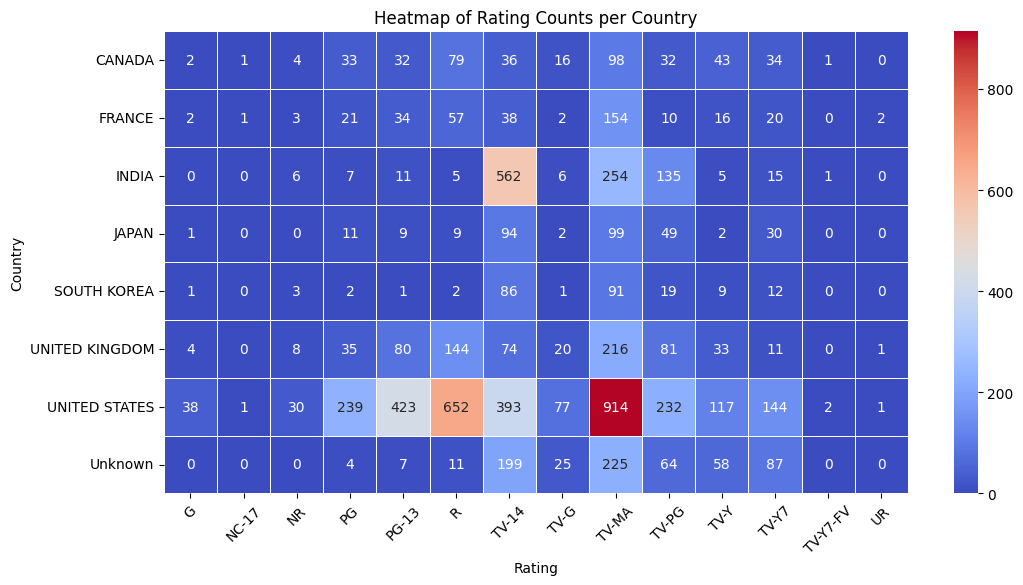

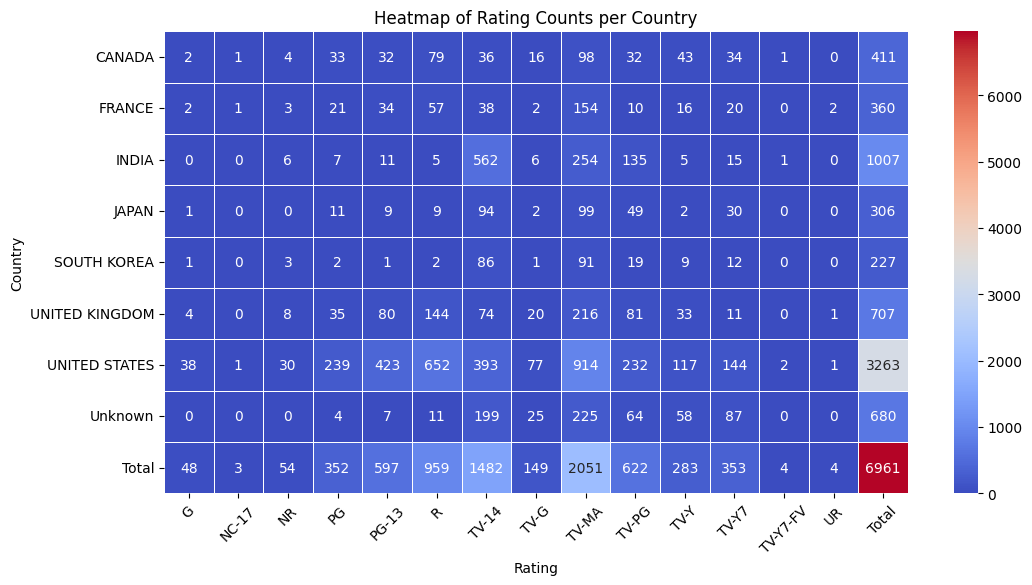

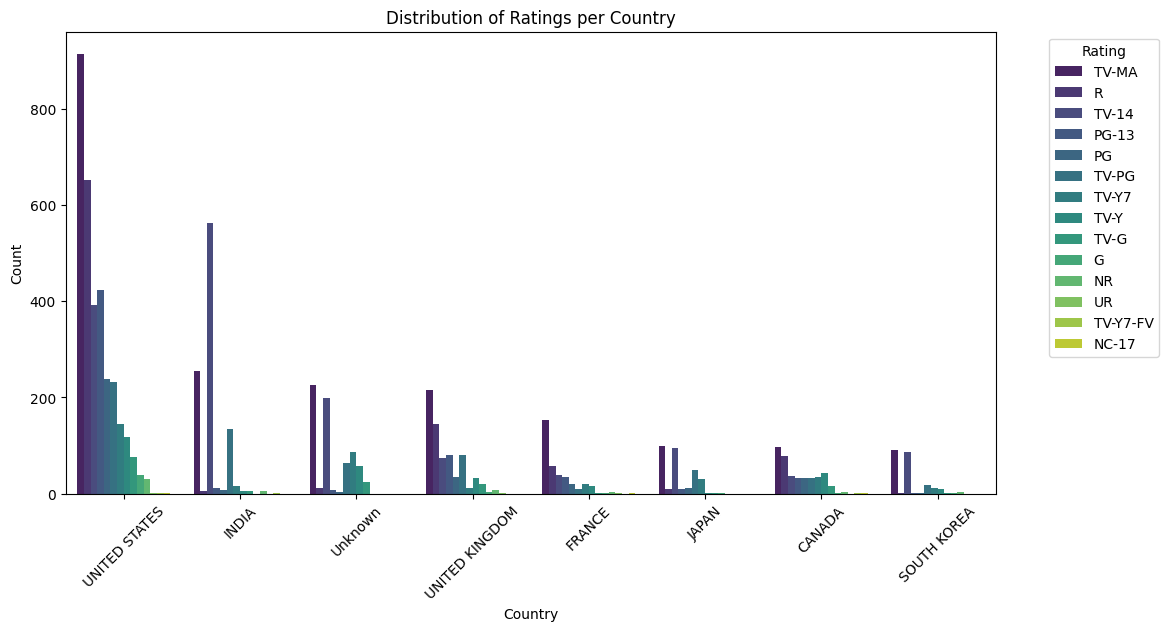

In [ ]:
rating_counts.rename(columns={'show_id': 'count'}, inplace=True)

# Pivot for heatmap
pivot_df = rating_counts.pivot(index='country', columns='rating', values='count').fillna(0)

#pivot_df['Total'] = pivot_df.sum(axis=1)  # Row-wise total
#pivot_df.loc['Total'] = pivot_df.sum()    # Column-wise total

# 🔥 Heatmap of Rating Distribution Per Country
rating_fig,ax=plt.subplots(figsize=(12, 6))
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='.0f', linewidths=0.5,ax=ax)
plt.title("Heatmap of Rating Counts per Country")
plt.xlabel("Rating")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.show()

pivot_df2=pivot_df.copy()
pivot_df2['Total'] = pivot_df2.sum(axis=1)  # Row-wise total
pivot_df2.loc['Total'] = pivot_df2.sum()    # Column-wise total

# 🔥 Heatmap of Rating Distribution Per Country
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df2, cmap='coolwarm', annot=True, fmt='.0f', linewidths=0.5)
plt.title("Heatmap of Rating Counts per Country")
plt.xlabel("Rating")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.show()

# 📊 Bar Plot of Rating Counts per Country
plt.figure(figsize=(12, 6))
sns.barplot(data=rating_counts, x='country', y='count', hue='rating', palette='viridis')
plt.title("Distribution of Ratings per Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
df7_unique_rating_movie=df7_unique_temp[df7_unique_temp['type']=="Movie"]
df7_unique_rating_tv_show=df7_unique_temp[df7_unique_temp['type']!="Movie"]

In [ ]:
pd.crosstab(df7_unique_rating_movie['country'],df7_unique_rating_movie['rating'])

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
country,,,,,,,,,,,,,,
CANADA,2,1,4,33,32,79,20,8,65,19,24,8,0,0
FRANCE,2,1,3,21,34,57,36,1,116,8,1,3,0,2
INDIA,0,0,6,7,11,5,541,5,228,127,0,11,1,0
JAPAN,1,0,0,11,9,9,20,0,31,28,0,5,0,0
SOUTH KOREA,1,0,3,2,1,2,4,0,36,4,1,5,0,0
UNITED KINGDOM,4,0,6,35,80,144,38,8,118,34,5,3,0,1
UNITED STATES,38,1,29,239,423,652,207,38,622,136,50,53,2,1
Unknown,0,0,0,4,7,10,109,14,120,28,35,51,0,0


<Axes: xlabel='rating', ylabel='country'>

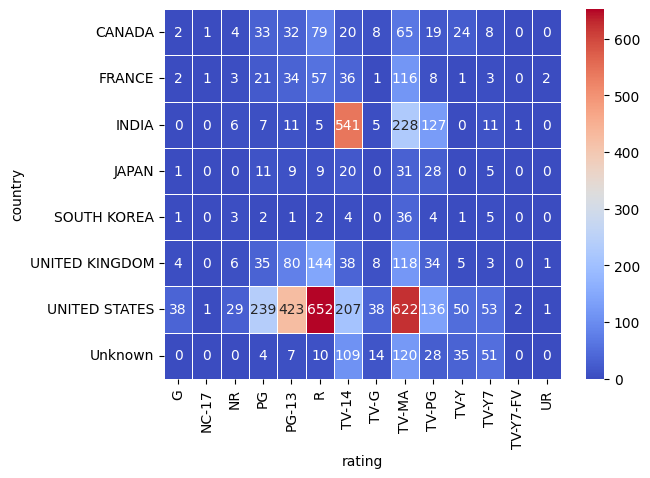

In [ ]:
sns.heatmap(data=pd.crosstab(df7_unique_rating_movie['country'],df7_unique_rating_movie['rating']), cmap='coolwarm', annot=True, fmt='.0f', linewidths=0.5)

In [ ]:
pd.crosstab(df7_unique_rating_tv_show['country'],df7_unique_rating_tv_show['rating'])

rating,NR,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV
country,,,,,,,,,
CANADA,0,0,16,8,33,13,19,26,1
FRANCE,0,0,2,1,38,2,15,17,0
INDIA,0,0,21,1,26,8,5,4,0
JAPAN,0,0,74,2,68,21,2,25,0
SOUTH KOREA,0,0,82,1,55,15,8,7,0
UNITED KINGDOM,2,0,36,12,98,47,28,8,0
UNITED STATES,1,0,186,39,292,96,67,91,0
Unknown,0,1,90,11,105,36,23,36,0


<Axes: xlabel='rating', ylabel='country'>

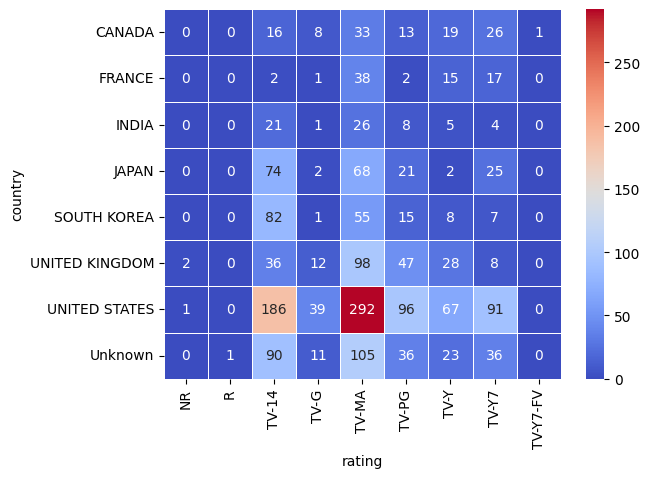

In [ ]:
sns.heatmap(data=pd.crosstab(df7_unique_rating_tv_show['country'],df7_unique_rating_tv_show['rating']), cmap='coolwarm', annot=True, fmt='.0f', linewidths=0.5)

**Overall Insights on Ratings and Content Trends**

1. Dominance of Mature Content (TV-MA & R Ratings)

 1. The highest-rated content across multiple countries falls under TV-MA (Mature Audience) and R-rated categories, especially in the United States, United Kingdom, and France.
 2. United States leads with 914 TV-MA shows/movies and 652 R-rated content, suggesting that mature-themed content has strong demand.
 3. India and South Korea, while producing mature content, still have a strong presence of TV-14 and TV-PG, indicating a preference for content suitable for wider audiences.

2. Family & Children’s Content (TV-Y, TV-Y7, TV-PG, and G)

 1. United States, Canada, and Japan produce a significant number of children's shows and family-friendly content (TV-Y, TV-Y7, TV-PG).
 2. Japan and South Korea particularly have a high number of animated and youth-oriented TV shows.
 3. India and France have very few children’s shows, indicating a potential gap in content for younger audiences.

3. Country-Specific Content Preferences

 1. United States & United Kingdom: Mature content (TV-MA & R) dominates, but there's still a sizable audience for family-friendly and PG-rated movies.
 2. India: TV-14 content leads (562), followed by TV-MA (254), and TV-PG (135). The Indian audience prefers a mix of teenage, young adult, and mature-themed content.
 3. Japan & South Korea: A large number of TV-14 and TV-MA-rated shows indicate an appetite for action-packed dramas and anime.
 4. France, Canada, and Germany: A mix of TV-14, TV-MA, and PG-rated content suggests diverse audience preferences, requiring a balanced production strategy.

**Movie-Specific Insights**
1. Mature Movies Perform Best in Western Markets

 1. The United States, United Kingdom, and France have a high number of R-rated and TV-MA movies.
 2. Netflix should continue investing in dark thrillers, crime dramas, and edgy content for these markets.

2. India’s Preference for TV-14 & TV-PG Movies

 1. Unlike Western countries, India leans towards TV-14 (541) and TV-PG (127) content, indicating that Netflix should focus on youth-friendly content like family dramas, action-adventure, and romance.

3. Canada & Japan’s Inclination Towards PG & Family Movies

 1. Canada has a high count of PG (33) and TV-PG (19) movies, suggesting that audiences favor feel-good, family-oriented films.
 2. Japan, known for anime and fantasy content, has a strong presence of PG, TV-14, and TV-MA movies, reinforcing the need for more animated and action-packed content.

**TV Show-Specific Insights**
1. TV-MA & TV-14 Dominate in Most Countries

 1. United States (292 TV-MA, 186 TV-14) and United Kingdom (98 TV-MA, 36 TV-14) show strong demand for mature and young adult TV series.
 2. South Korea & Japan also have a high count of TV-14 and TV-MA content, reinforcing the dominance of K-dramas, anime, and action-packed storytelling.

2. High Demand for Children's Shows in Certain Regions

 1. United States (67 TV-Y, 91 TV-Y7) and Canada (19 TV-Y, 26 TV-Y7) indicate a strong market for kids’ TV shows.
 1. France and India lack significant children's content, which could be a growth opportunity for Netflix in these markets.


## 2. Director Column vs Country




In [ ]:
df8_unique=df7.drop_duplicates(subset=['show_id','country','director'])
df8_unique
print(df7.shape)
print(df8_unique.shape)
temp=df8_unique['country'].value_counts().reset_index()
temp['percentage']=round(temp['count']/df8_unique['country'].nunique(),2)
print(temp.head(20))
temp=temp.loc[:7,['country']]


(199406, 12)
(10679, 12)
           country  count  percentage
0    UNITED STATES   3572       30.79
1            INDIA   1080        9.31
2   UNITED KINGDOM    750        6.47
3          Unknown    722        6.22
4           CANADA    459        3.96
5           FRANCE    406        3.50
6            JAPAN    340        2.93
7      SOUTH KOREA    235        2.03
8            SPAIN    223        1.92
9          GERMANY    222        1.91
10           CHINA    170        1.47
11          MEXICO    169        1.46
12       AUSTRALIA    146        1.26
13           EGYPT    121        1.04
14       HONG KONG    119        1.03
15          TURKEY    117        1.01
16         NIGERIA    103        0.89
17          TAIWAN    101        0.87
18       INDONESIA     99        0.85
19       ARGENTINA     95        0.82


we will use only first7 as they atleast contribute more than 1% percent of data

In [ ]:

list_of_countries_to_be_considered=list(temp['country'])
list_of_countries_to_be_considered

['UNITED STATES',
 'INDIA',
 'UNITED KINGDOM',
 'Unknown',
 'CANADA',
 'FRANCE',
 'JAPAN',
 'SOUTH KOREA']

In [ ]:
df8_unique=df8_unique.loc[df8_unique['country'].isin(list_of_countries_to_be_considered)]
df8_unique.shape

(7564, 12)

In [ ]:
total_directer_per_country=df8_unique.groupby(['country'])['director'].count().reset_index()
total_directer_per_country.sort_values(by='director',ascending=False).head(10)

,country,director
6,UNITED STATES,3572
2,INDIA,1080
5,UNITED KINGDOM,750
7,Unknown,722
0,CANADA,459
1,FRANCE,406
3,JAPAN,340
4,SOUTH KOREA,235


In [ ]:
total_movie_per_director_per_country=df8_unique.groupby(['country','director'])['show_id'].count().reset_index()
total_movie_per_director_per_country.rename(columns={'show_id':'total_movie'},inplace=True)
total_movie_per_director_per_country

,country,director,total_movie
0,CANADA,AARON SORKIN,1
1,CANADA,AARON WOODLEY,1
2,CANADA,ADAM ALLECA,1
3,CANADA,ADAM B. STEIN,1
4,CANADA,ADAM MACDONALD,1
...,...,...,...
4308,Unknown,YIN CHEN-HAO,1
4309,Unknown,YOO BYUNG-JAE,1
4310,Unknown,YOSHIKAZU YASUHIKO,3
4311,Unknown,YOSHIYUKI TOMINO,4


In [ ]:
total_year_per_director_per_country=df8_unique.groupby(['country','director'])['release_year'].agg(['min','max']).reset_index()
total_year_per_director_per_country['year_active']=total_year_per_director_per_country['max']-total_year_per_director_per_country['min']+1
total_year_per_director_per_country

,country,director,min,max,year_active
0,CANADA,AARON SORKIN,2017,2017,1
1,CANADA,AARON WOODLEY,2019,2019,1
2,CANADA,ADAM ALLECA,2015,2015,1
3,CANADA,ADAM B. STEIN,2018,2018,1
4,CANADA,ADAM MACDONALD,2014,2014,1
...,...,...,...,...,...
4308,Unknown,YIN CHEN-HAO,2021,2021,1
4309,Unknown,YOO BYUNG-JAE,2018,2018,1
4310,Unknown,YOSHIKAZU YASUHIKO,1981,1982,2
4311,Unknown,YOSHIYUKI TOMINO,1981,1988,8


In [ ]:
director_stats=total_movie_per_director_per_country.merge(total_year_per_director_per_country,left_on=['country','director'],right_on=['country','director'])
director_stats.sort_values(by='total_movie',ascending=False)

,country,director,total_movie,min,max,year_active
3915,UNITED STATES,Unknown,780,1963,2021,59
4298,Unknown,Unknown,312,1991,2021,31
1946,UNITED KINGDOM,Unknown,222,1972,2021,50
1417,JAPAN,Unknown,182,1981,2021,41
1493,SOUTH KOREA,Unknown,159,2009,2021,13
...,...,...,...,...,...,...
1555,UNITED KINGDOM,BRIAN A. MILLER,1,2014,2014,1
1556,UNITED KINGDOM,BRIAN DE PALMA,1,2019,2019,1
1557,UNITED KINGDOM,BRIAN HELGELAND,1,2015,2015,1
1558,UNITED KINGDOM,BRIAN KLEIN,1,2017,2017,1


In [ ]:
director_stats['director'].nunique()

3562

In [ ]:
temp=df8_unique['director'].value_counts().reset_index()
temp['percentage']=round(sum(temp['count']>20)/df8_unique['director'].nunique(),2)
print(df8_unique['director'].nunique())
print(sum(temp['count']>9)/df8_unique['director'].nunique()*100)
print(temp.head(20))
temp=temp.loc[:7,['director']]

3562
0.308815272318922
             director  count  percentage
0             Unknown   1905         0.0
1       RAJIV CHILAKA     19         0.0
2    STEVEN SPIELBERG     17         0.0
3        MARCUS RABOY     16         0.0
4     MARTIN SCORSESE     16         0.0
5           JAY KARAS     15         0.0
6         SUHAS KADAV     13         0.0
7         JAY CHAPMAN     12         0.0
8    DON MICHAEL PAUL     10         0.0
9      ANURAG KASHYAP     10         0.0
10         RON HOWARD     10         0.0
11    SHANNON HARTMAN      9         0.0
12     JUSTIN G. DYCK      9         0.0
13  QUENTIN TARANTINO      9         0.0
14    MARTIN CAMPBELL      9         0.0
15       ROBERT VINCE      9         0.0
16       DAVID DHAWAN      9         0.0
17        ISHI RUDELL      9         0.0
18    LASSE HALLSTRÖM      9         0.0
19     VINCE MARCELLO      9         0.0




1.   There are a total of 3,512 unique directors, with the majority (99%) having a contribution range of 0-9 movies. Additionally, there are 1,905 unknown values. Given the inconsistency in the data, we can analyze only the top 10 directors. However, for recommending directors, it would be more reliable to consider the most recent director associated with a production.
2.   So we will consider director in the past 10 years only.
3.   First we will remove the show for unkwon director



In [ ]:
director_stats=director_stats[director_stats['director']!='Unknown']
director_stats.describe()

,total_movie,min,max,year_active
count,4305.000000,4305.000000,4305.000000,4305.000000
mean,1.314518,2012.536585,2013.743089,2.206504
std,0.966462,10.089544,9.323939,3.930726
min,1.000000,1942.000000,1942.000000,1.000000
25%,1.000000,2011.000000,2013.000000,1.000000
50%,1.000000,2016.000000,2017.000000,1.000000
75%,1.000000,2018.000000,2019.000000,1.000000
max,15.000000,2021.000000,2021.000000,53.000000


In [ ]:
director_stats[director_stats['director']=='Unknown']

,country,director,total_movie,min,max,year_active


In [ ]:
director_stats=director_stats.loc[director_stats['min']>=2011]
director_stats['movies_per_year']=director_stats['total_movie']/director_stats['year_active']
director_stats=director_stats.sort_values(by=['movies_per_year','total_movie','year_active'],ascending=[False,False,True]).reset_index(drop=True)
director_stats.head(15)

,country,director,total_movie,min,max,year_active,movies_per_year
0,CANADA,JUSTIN G. DYCK,8,2017,2018,2,4.0
1,Unknown,RATHINDRAN R PRASAD,4,2021,2021,1,4.0
2,Unknown,JOEY SO,6,2019,2020,2,3.0
3,UNITED KINGDOM,EDWARD COTTERILL,3,2017,2017,1,3.0
4,UNITED STATES,DUSTIN MCKENZIE,3,2013,2013,1,3.0
5,UNITED STATES,GREG RANKIN,3,2020,2020,1,3.0
6,UNITED STATES,LINDA MENDOZA,3,2019,2019,1,3.0
7,UNITED STATES,MATT ASKEM,3,2018,2018,1,3.0
8,UNITED STATES,TJ SULLIVAN,3,2020,2020,1,3.0
9,Unknown,ADRIANO RUDIMAN,3,2020,2020,1,3.0


In [ ]:

temp=director_stats.loc[:10,['director']]

list_of_directors_to_be_considered=list(temp['director'])
list_of_directors_to_be_considered


['JUSTIN G. DYCK',
 'RATHINDRAN R PRASAD',
 'JOEY SO',
 'EDWARD COTTERILL',
 'DUSTIN MCKENZIE',
 'GREG RANKIN',
 'LINDA MENDOZA',
 'MATT ASKEM',
 'TJ SULLIVAN',
 'ADRIANO RUDIMAN',
 'ASIT MOHAPATRA']

In [ ]:
director_stats=director_stats[director_stats['director'].isin(list_of_directors_to_be_considered)]
director_stats

,country,director,total_movie,min,max,year_active,movies_per_year
0,CANADA,JUSTIN G. DYCK,8,2017,2018,2,4.0
1,Unknown,RATHINDRAN R PRASAD,4,2021,2021,1,4.0
2,Unknown,JOEY SO,6,2019,2020,2,3.0
3,UNITED KINGDOM,EDWARD COTTERILL,3,2017,2017,1,3.0
4,UNITED STATES,DUSTIN MCKENZIE,3,2013,2013,1,3.0
5,UNITED STATES,GREG RANKIN,3,2020,2020,1,3.0
6,UNITED STATES,LINDA MENDOZA,3,2019,2019,1,3.0
7,UNITED STATES,MATT ASKEM,3,2018,2018,1,3.0
8,UNITED STATES,TJ SULLIVAN,3,2020,2020,1,3.0
9,Unknown,ADRIANO RUDIMAN,3,2020,2020,1,3.0


In [ ]:
df8_unique=df8_unique[df8_unique['director'].isin(list_of_directors_to_be_considered)]
df8_unique['director'].unique()

array(['RATHINDRAN R PRASAD', 'ADRIANO RUDIMAN', 'GREG RANKIN',
       'TJ SULLIVAN', 'JUSTIN G. DYCK', 'JOEY SO', 'LINDA MENDOZA',
       'MATT ASKEM', 'EDWARD COTTERILL', 'ASIT MOHAPATRA',
       'DUSTIN MCKENZIE'], dtype=object)

In [ ]:
df8_unique[df8_unique['show_id'].duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
39479,s1656,Movie,Dragons: Rescue Riders: Huttsgalor Holiday,TJ SULLIVAN,NOAH KAYE BENTLEY,UNITED STATES,2020-11-24,2020,TV-Y,46 MIN,CHILDREN & FAMILY MOVIES,Snowfall marks the start of Odinyule — the Vik...
40114,s1692,Movie,A Very Country Christmas,JUSTIN G. DYCK,BEA SANTOS,CANADA,2020-11-15,2017,TV-G,84 MIN,MUSIC & MUSICALS,When an unfulfilled country music star hides o...
51941,s2209,Movie,Dragons: Rescue Riders: Secrets of the Songwing,TJ SULLIVAN,NOAH KAYE BENTLEY,UNITED STATES,2020-07-24,2020,TV-Y,46 MIN,CHILDREN & FAMILY MOVIES,When a musical dragon with a beautiful voice h...
65232,s2764,Movie,Dragons: Rescue Riders: Hunt for the Golden Dr...,GREG RANKIN,NOAH KAYE BENTLEY,UNITED STATES,2020-03-27,2020,TV-Y,46 MIN,CHILDREN & FAMILY MOVIES,It's the treasure hunt of a lifetime for the R...


In [ ]:
df8_unique[df8_unique['show_id']=='s2764']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
65210,s2764,Movie,Dragons: Rescue Riders: Hunt for the Golden Dr...,TJ SULLIVAN,NOAH KAYE BENTLEY,UNITED STATES,2020-03-27,2020,TV-Y,46 MIN,CHILDREN & FAMILY MOVIES,It's the treasure hunt of a lifetime for the R...
65232,s2764,Movie,Dragons: Rescue Riders: Hunt for the Golden Dr...,GREG RANKIN,NOAH KAYE BENTLEY,UNITED STATES,2020-03-27,2020,TV-Y,46 MIN,CHILDREN & FAMILY MOVIES,It's the treasure hunt of a lifetime for the R...


In [ ]:
df8_unique.groupby(['type','country','director'])['show_id'].count()

type     country         director           
Movie    CANADA          JUSTIN G. DYCK         8
         UNITED KINGDOM  EDWARD COTTERILL       3
                         MATT ASKEM             2
         UNITED STATES   DUSTIN MCKENZIE        3
                         GREG RANKIN            3
                         JUSTIN G. DYCK         1
                         LINDA MENDOZA          3
                         MATT ASKEM             3
                         TJ SULLIVAN            3
         Unknown         ADRIANO RUDIMAN        3
                         ASIT MOHAPATRA         3
                         JOEY SO                6
                         RATHINDRAN R PRASAD    4
TV Show  INDIA           RATHINDRAN R PRASAD    1
Name: show_id, dtype: int64

<Axes: xlabel='type', ylabel='count'>

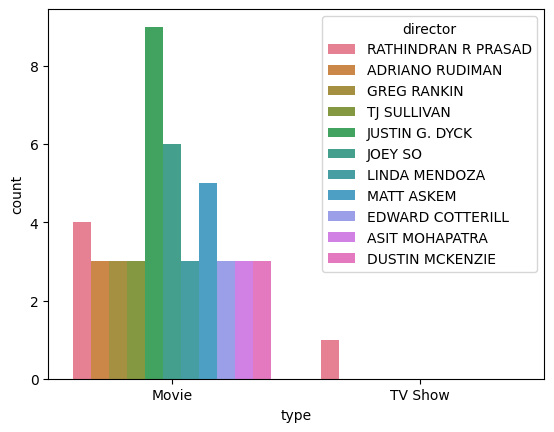

In [ ]:
sns.countplot(data=df8_unique,x='type',hue='director')

**Insights on Directors in Netflix Data**

1. Inconsistent and Incomplete Data

  - The dataset contains 1,905 unknown director values, making it difficult to derive meaningful insights.
  - Additionally, 99% of directors have contributed to fewer than 10 movies, indicating a lack of consistency in director-based trends.

2. Limited Impact of Directors on Recommendations

  - Most directors in the dataset have worked on only 1–3 movies, making it unreliable to recommend content based solely on them.
  - Even among the top directors, the highest contribution is only 8 movies, which is not a significant differentiator.

3. Recent Directors as a More Reliable Metric

  - To enhance reliability, only directors active in the past 10 years are considered.
  - This helps focus on relevant content, but the limited number of contributions per director still presents a challenge.

**Recommendation Strategy**

Given the inconsistent data and limited impact of directors, it is not advisable to prioritize director-based recommendations

## 3. Release Year vs. Netflix Addition Year for Movies & Shows

In [ ]:
df8=df7.copy()
df8['added_year']=df8['date_added'].dt.year
df8['Gap_bw_release_and_add_year']=df8['added_year']-df8['release_year']

df8['date_added_day']=df8['date_added'].dt.day_name()
df8['Weekend']=df8['date_added_day'].isin(['Friday','Saturday','Sunday'])

df8=df8[df8['country'].isin(top10_countries)]
print(df8.shape)
df8.head()

(144626, 16)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,Gap_bw_release_and_add_year,date_added_day,Weekend
57,s3,TV Show,Ganglands,JULIEN LECLERCQ,SAMI BOUAJILA,Unknown,2021-09-24,2021,TV-MA,1 SEASON,CRIME TV SHOWS,To protect his family from a powerful drug lor...,2021,0,Friday,True
58,s3,TV Show,Ganglands,JULIEN LECLERCQ,SAMI BOUAJILA,Unknown,2021-09-24,2021,TV-MA,1 SEASON,INTERNATIONAL TV SHOWS,To protect his family from a powerful drug lor...,2021,0,Friday,True
59,s3,TV Show,Ganglands,JULIEN LECLERCQ,SAMI BOUAJILA,Unknown,2021-09-24,2021,TV-MA,1 SEASON,ACTION & ADVENTURE,To protect his family from a powerful drug lor...,2021,0,Friday,True
60,s3,TV Show,Ganglands,JULIEN LECLERCQ,TRACY GOTOAS,Unknown,2021-09-24,2021,TV-MA,1 SEASON,CRIME TV SHOWS,To protect his family from a powerful drug lor...,2021,0,Friday,True
61,s3,TV Show,Ganglands,JULIEN LECLERCQ,TRACY GOTOAS,Unknown,2021-09-24,2021,TV-MA,1 SEASON,INTERNATIONAL TV SHOWS,To protect his family from a powerful drug lor...,2021,0,Friday,True


###  Without Country Filter

In [ ]:
df8_without_countries=df8.drop_duplicates(subset=['show_id'])
df8_without_countries.shape

(6433, 16)

In [ ]:
total_type=df8_without_countries['type'].value_counts().reset_index()
total_no_TV_show=total_type['count'][total_type['type']=='TV Show']
total_no_Movies=total_type['count'][total_type['type']=='Movie']
print(total_type)
print(total_no_TV_show)
print(total_no_Movies)

      type  count
0    Movie   4600
1  TV Show   1833
1    1833
Name: count, dtype: int64
0    4600
Name: count, dtype: int64


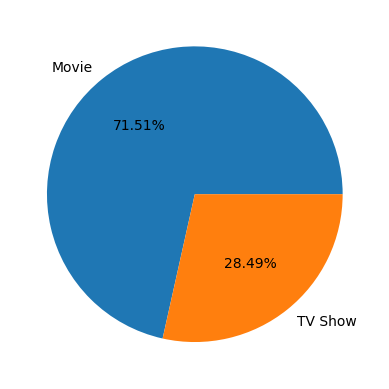

In [ ]:
plt.pie(df8_without_countries['type'].value_counts(),labels=df8_without_countries['type'].value_counts().index,autopct='%.2f%%')
plt.show()

In [ ]:
print(df8_without_countries.shape)
count_of_year=df8_without_countries['added_year'].value_counts()
count_of_year

(6433, 16)


,count
added_year,
2019,1465
2020,1335
2018,1210
2021,1143
2017,863
2016,298
2015,70
2014,20
2011,13


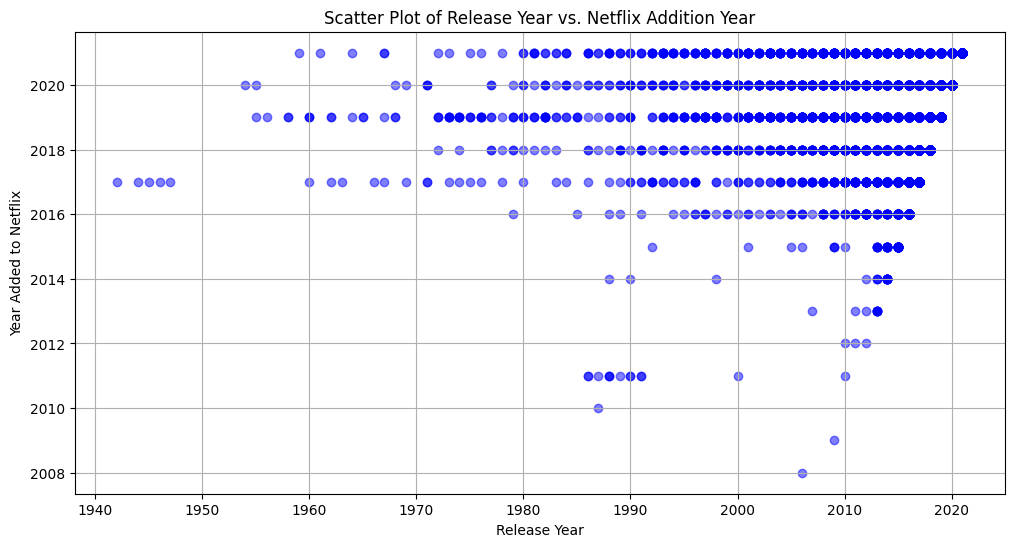

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df8_without_countries['release_year'], df8_without_countries["added_year"], alpha=0.5, color='blue')
plt.xlabel("Release Year")
plt.ylabel("Year Added to Netflix")
plt.title("Scatter Plot of Release Year vs. Netflix Addition Year")
plt.grid(True)
plt.show()

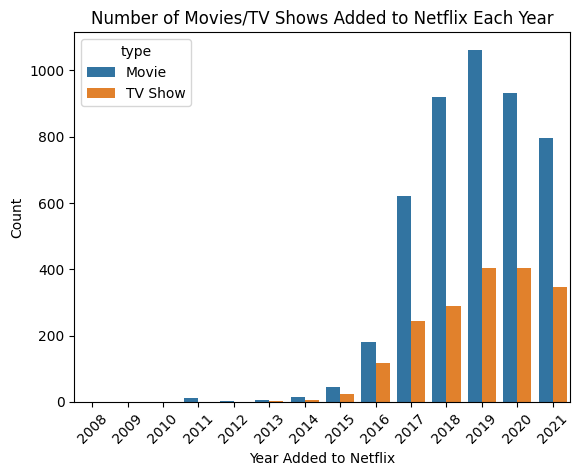

In [ ]:
sns.countplot(data=df8_without_countries,x='added_year',hue='type')
plt.xticks(rotation=45)
plt.title("Number of Movies/TV Shows Added to Netflix Each Year")
plt.xlabel("Year Added to Netflix")
plt.ylabel("Count")
plt.show()

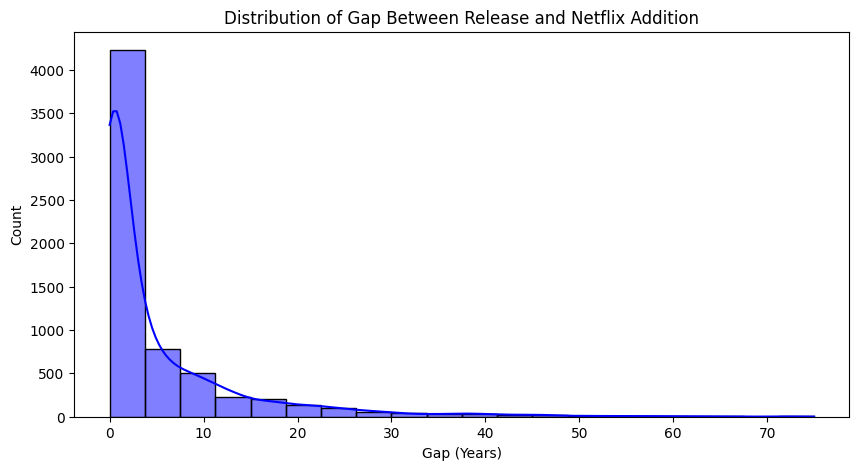

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df8_without_countries['Gap_bw_release_and_add_year'], bins=20, kde=True, color="blue")
plt.title("Distribution of Gap Between Release and Netflix Addition")
plt.xlabel("Gap (Years)")
plt.ylabel("Count")
plt.show()

In [ ]:
#weekdatys  vs weekend
#df8_weekend_group=df8_without_countries.groupby(['type','Weekend'])['show_id'].count().reset_index()
df8_weekend_group = (
    df8_without_countries
    .groupby(['type', 'Weekend'])['show_id']
    .count()
    .reset_index()
    .assign(percentage=lambda x: (x['show_id'] / x.groupby('type')['show_id'].transform('sum') * 100).round(2))
)
df8_weekend_group.rename(columns={'show_id':'count'},inplace=True)

df8_weekend_group

,type,Weekend,count,percentage
0,Movie,False,2601,56.54
1,Movie,True,1999,43.46
2,TV Show,False,881,48.06
3,TV Show,True,952,51.94


Text(0.5, 1.0, 'Distribution of movie and tv show for weekend Netflix Addition')

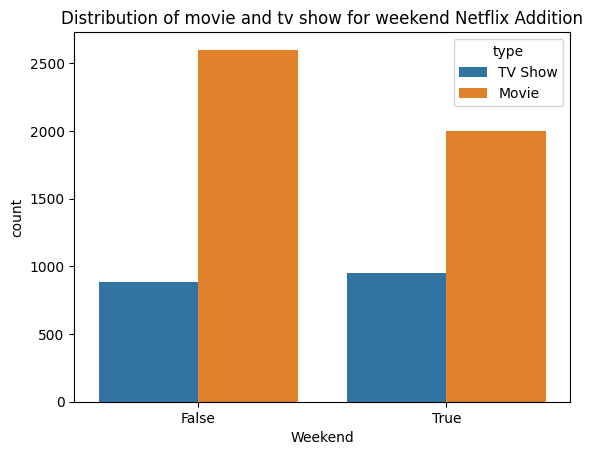

In [ ]:
sns.countplot(data=df8_without_countries,x='Weekend',hue='type')
plt.title("Distribution of movie and tv show for weekend Netflix Addition")

Insights and Recommendations for Netflix

**1. Gap Between Release Year and Netflix Addition**
  - The first graph shows that most content added to Netflix has a small gap between its original release and when it is added to the platform.
  - The distribution is right-skewed, meaning Netflix prioritizes newer content.
  - However, there are some older movies/shows being added as well, but they are significantly fewer.

 **Recommendations:**

  - Focus on acquiring fresh content (movies and shows within 1–5 years of release) to keep the catalog updated and relevant.
  - Identify high-performing older movies/shows that could still attract viewers and strategically acquire them (e.g., cult classics, critically acclaimed films).

**2. Weekend Additions (Movies vs. TV Shows)**
  - Movies are more frequently added on weekdays (56.54%) compared to weekends (43.46%).
  - TV shows are more evenly split, with a slight preference for weekend additions (51.94%).

  **Recommendations : **

  - Increase movie releases on weekends to capture peak viewership times.
  - Use weekend releases for exclusive/anticipated content (new seasons, popular series, or trending movies) to maximize engagement.

**3. Number of Movies/TV Shows Added Each Year**
  - The number of new additions to Netflix increased significantly between 2015 and 2020, peaking around 2019.
  - After 2020, the number of new additions started declining, possibly due to changes in licensing, content strategy, or the impact of COVID-19.
  - Movies are added in significantly higher numbers than TV shows, suggesting Netflix relies more on movie content.




### With Country Filter

In [ ]:
df8_with_countries=df8.drop_duplicates(subset=['show_id','country'])
df8_with_countries.shape

(7377, 16)

In [ ]:
total_type=df8_with_countries['type'].value_counts().reset_index()
total_no_TV_show=total_type['count'][total_type['type']=='TV Show']
total_no_Movies=total_type['count'][total_type['type']=='Movie']
print(total_type)
print(total_no_TV_show)
print(total_no_Movies)

      type  count
0    Movie   5364
1  TV Show   2013
1    2013
Name: count, dtype: int64
0    5364
Name: count, dtype: int64


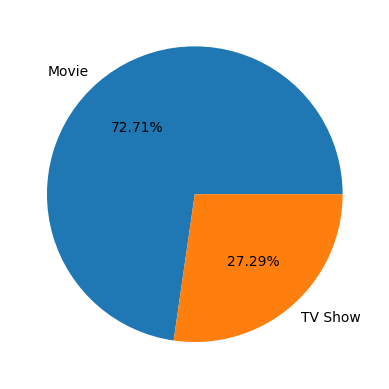

In [ ]:
plt.pie(df8_with_countries['type'].value_counts(),labels=df8_without_countries['type'].value_counts().index,autopct='%.2f%%')
plt.show()

In [ ]:
df8_with_countries.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'added_year', 'Gap_bw_release_and_add_year', 'date_added_day',
       'Weekend'],
      dtype='object')

In [ ]:
df8_with_countries_group=df8_with_countries.groupby(['country','type'])['show_id'].count().reset_index()
df8_with_countries_group.rename(columns={'show_id':'Count'},inplace=True)
df8_with_countries_group

,country,type,Count
0,CANADA,Movie,295
1,CANADA,TV Show,116
2,FRANCE,Movie,285
3,FRANCE,TV Show,75
4,GERMANY,Movie,168
5,GERMANY,TV Show,39
6,INDIA,Movie,942
7,INDIA,TV Show,65
8,JAPAN,Movie,114
9,JAPAN,TV Show,192


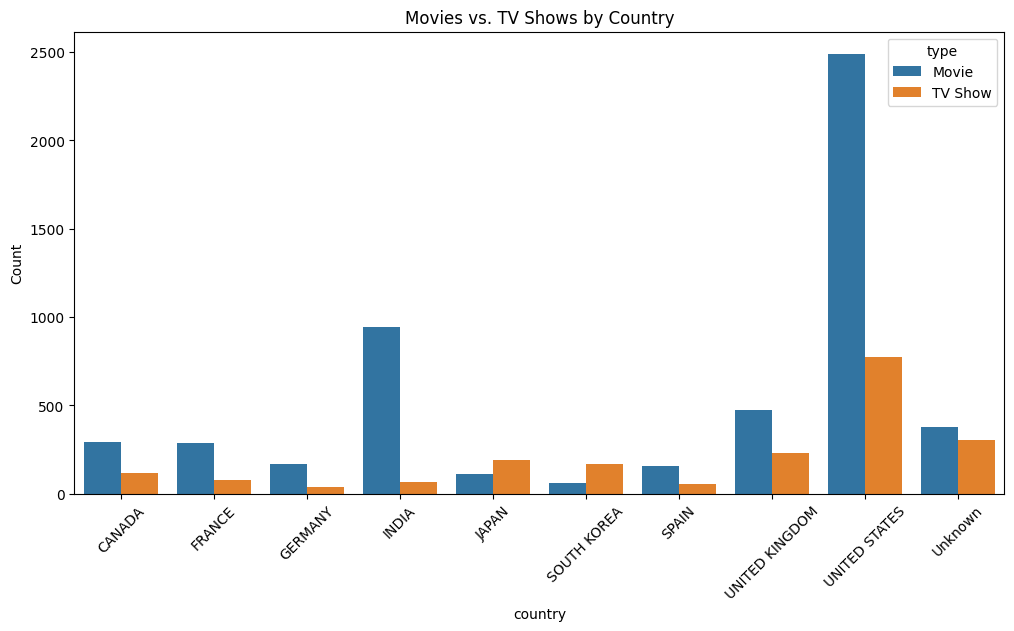

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="country", y="Count", hue="type", data=df8_with_countries_group)
plt.xticks(rotation=45)
plt.title("Movies vs. TV Shows by Country")
plt.ylabel("Count")
plt.show()

In [ ]:
df_pivot=pd.crosstab(df8_with_countries['country'],df8_with_countries['type'])
df_pivot

type,Movie,TV Show
country,,
CANADA,295,116
FRANCE,285,75
GERMANY,168,39
INDIA,942,65
JAPAN,114,192
SOUTH KOREA,59,168
SPAIN,156,53
UNITED KINGDOM,476,231
UNITED STATES,2491,772


In [ ]:

df8_with_countries['Gap_bw_release_and_add_year'][df8_with_countries['country']=='INDIA'].sum()

6921

In [ ]:
df8_gap_country_type_group=df8_with_countries.groupby(['country','type'])['Gap_bw_release_and_add_year'].mean().reset_index()
df8_gap_country_type_group.rename(columns={'Gap_bw_release_and_add_year':'avg_gap_bw_release_and_add_year'})
df8_gap_country_type_group

,country,type,Gap_bw_release_and_add_year
0,CANADA,Movie,4.145763
1,CANADA,TV Show,2.948276
2,FRANCE,Movie,5.642105
3,FRANCE,TV Show,3.213333
4,GERMANY,Movie,6.845238
5,GERMANY,TV Show,0.871795
6,INDIA,Movie,7.221868
7,INDIA,TV Show,1.815385
8,JAPAN,Movie,5.964912
9,JAPAN,TV Show,4.635417


In [ ]:
df_pivot = df8_gap_country_type_group.pivot_table(index='country', columns='type', values='Gap_bw_release_and_add_year')
df_pivot.columns = ['Movies', 'TV Show']
df_pivot

,Movies,TV Show
country,,
CANADA,4.145763,2.948276
FRANCE,5.642105,3.213333
GERMANY,6.845238,0.871795
INDIA,7.221868,1.815385
JAPAN,5.964912,4.635417
SOUTH KOREA,1.694915,1.761905
SPAIN,2.064103,1.000000
UNITED KINGDOM,6.640756,2.965368
UNITED STATES,7.116821,2.590674


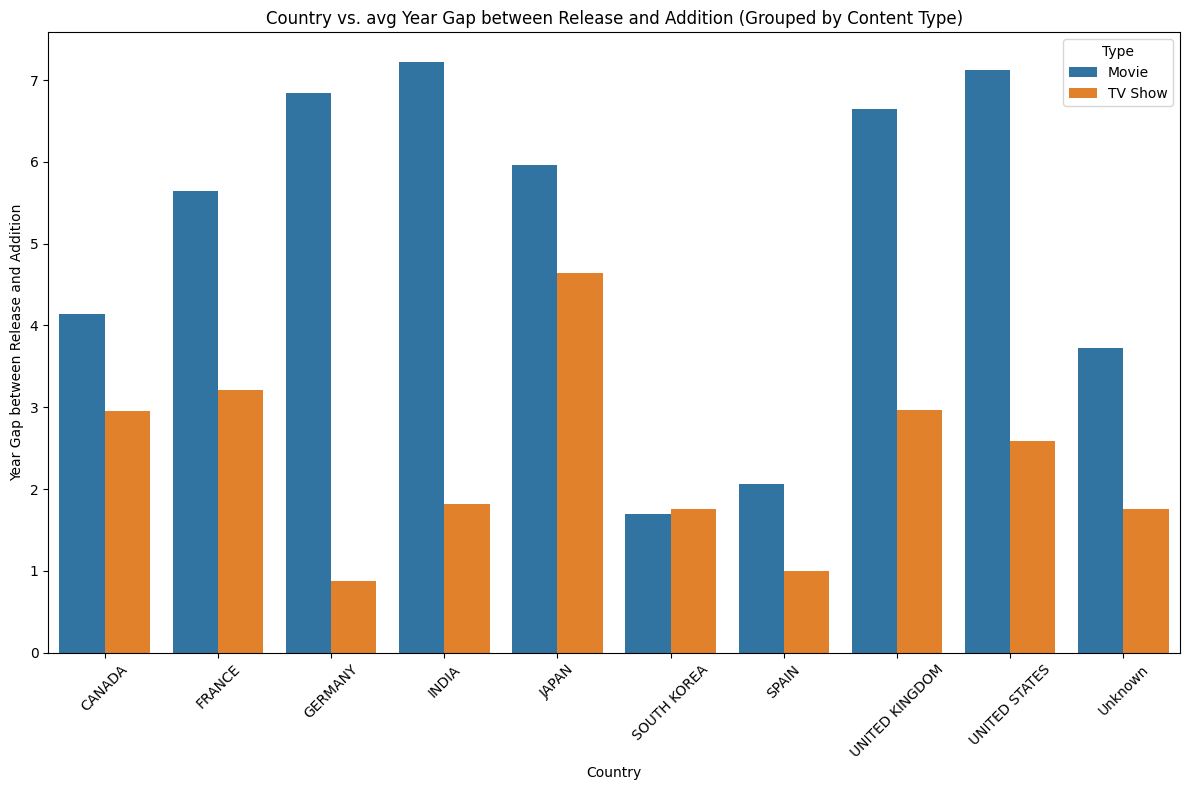

In [ ]:



# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=df8_gap_country_type_group,x='country', y='Gap_bw_release_and_add_year',hue='type')

# Customize the plot
plt.title('Country vs. avg Year Gap between Release and Addition (Grouped by Content Type)')
plt.xlabel('Country')
plt.ylabel('Year Gap between Release and Addition')
plt.xticks(rotation=45)
plt.legend(title='Type', loc='upper right')
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
#weekdatys  vs weekend
#df8_weekend_group=df8_without_countries.groupby(['type','Weekend'])['show_id'].count().reset_index()
df8_weekend_group = (
    df8_with_countries
    .groupby(['type','country', 'Weekend'])['show_id']
    .count()
    .reset_index()
    .assign(percentage=lambda x: (x['show_id'] / x.groupby(['type','country'])['show_id'].transform('sum') * 100).round(2))
)
df8_weekend_group.rename(columns={'show_id':'count'},inplace=True)

df8_weekend_group

,type,country,Weekend,count,percentage
0,Movie,CANADA,False,161,54.58
1,Movie,CANADA,True,134,45.42
2,Movie,FRANCE,False,130,45.61
3,Movie,FRANCE,True,155,54.39
4,Movie,GERMANY,False,103,61.31
5,Movie,GERMANY,True,65,38.69
6,Movie,INDIA,False,579,61.46
7,Movie,INDIA,True,363,38.54
8,Movie,JAPAN,False,66,57.89
9,Movie,JAPAN,True,48,42.11


In [ ]:
df_pivot = df8_weekend_group.pivot_table(index=['country', 'type'], columns='Weekend', values='percentage', aggfunc='sum')
df_pivot.columns = ['Weekday', 'Weekend']
df_pivot

Weekday  Weekend
country        type                     
CANADA         Movie      54.58    45.42
               TV Show    41.38    58.62
FRANCE         Movie      45.61    54.39
               TV Show    40.00    60.00
GERMANY        Movie      61.31    38.69
               TV Show    53.85    46.15
INDIA          Movie      61.46    38.54
               TV Show    38.46    61.54
JAPAN          Movie      57.89    42.11
               TV Show    56.77    43.23
SOUTH KOREA    Movie      52.54    47.46
               TV Show    58.93    41.07
SPAIN          Movie      41.03    58.97
               TV Show    22.64    77.36
UNITED KINGDOM Movie      58.40    41.60
               TV Show    47.19    52.81
UNITED STATES  Movie      56.04    43.96
               TV Show    44.95    55.05
Unknown        Movie      58.20    41.80
               TV Show    51.32    48.68

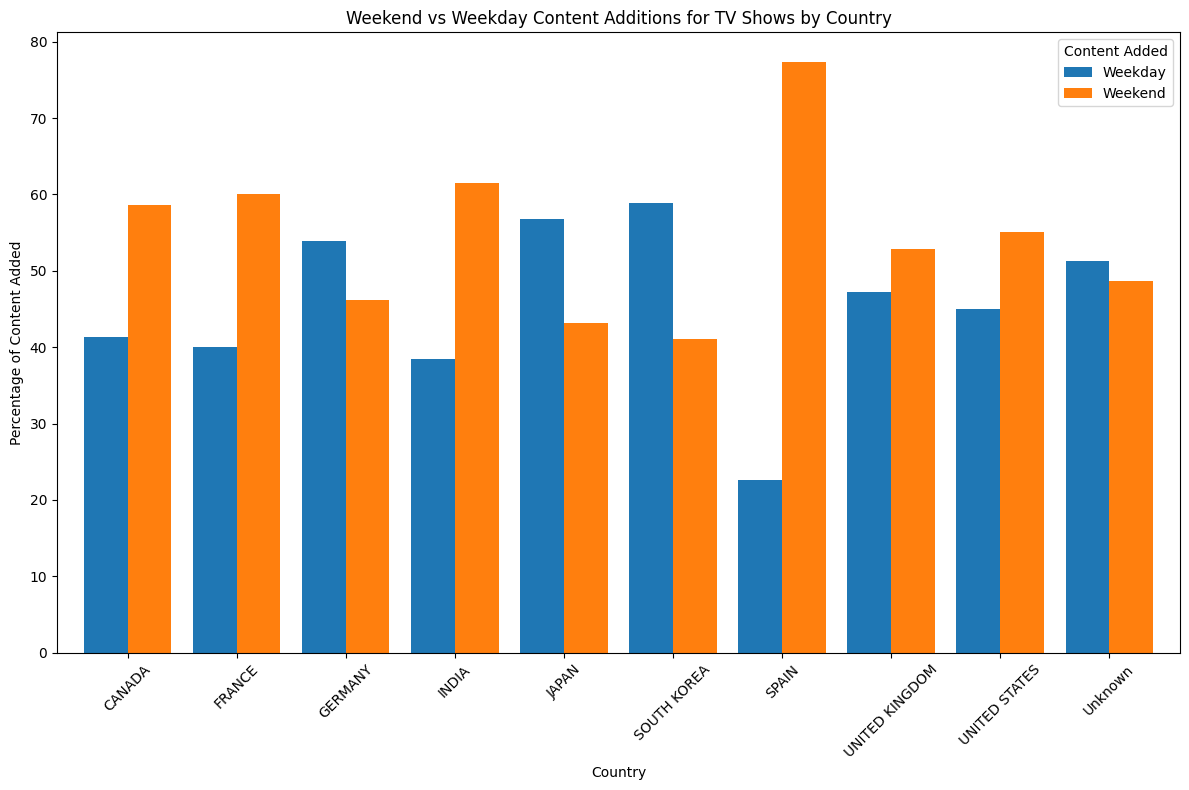

In [ ]:
df_pivot.reset_index(inplace=True)

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))
df_pivot[df_pivot['type'] == 'TV Show'].plot(kind='bar', x='country', y=['Weekday', 'Weekend'], ax=ax, width=0.8)

# Customize the plot
plt.title('Weekend vs Weekday Content Additions for TV Shows by Country')
plt.xlabel('Country')
plt.ylabel('Percentage of Content Added')
plt.xticks(rotation=45)
plt.legend(title='Content Added', loc='upper right')
plt.tight_layout()

# Display the plot
plt.show()

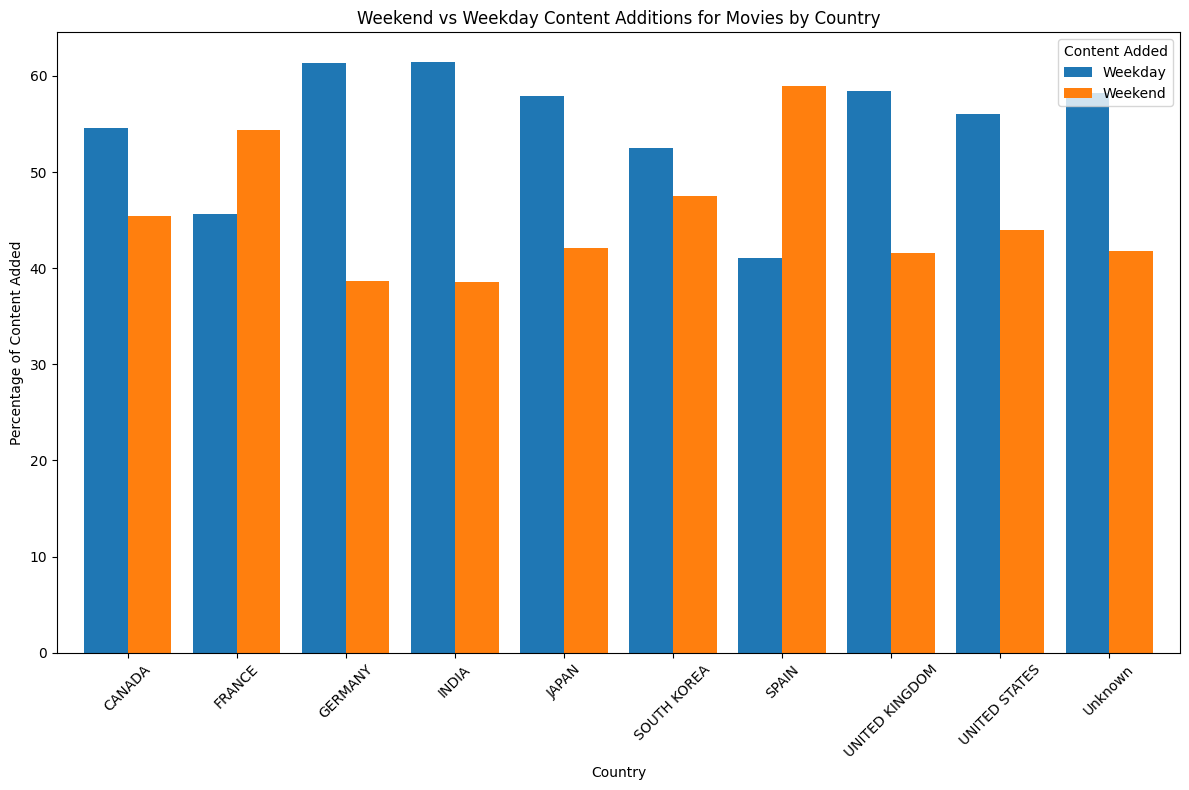

In [ ]:


# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))
df_pivot[df_pivot['type'] == 'Movie'].plot(kind='bar', x='country', y=['Weekday', 'Weekend'], ax=ax, width=0.8)

# Customize the plot
plt.title('Weekend vs Weekday Content Additions for Movies by Country')
plt.xlabel('Country')
plt.ylabel('Percentage of Content Added')
plt.xticks(rotation=45)
plt.legend(title='Content Added', loc='upper right')
plt.tight_layout()

# Display the plot
plt.show()

**1. Country-Specific Insights**
  - United States has the highest number of movies and TV shows available, suggesting that Netflix's largest market is in the U.S. with a clear preference for a wide variety of content.
  - India stands out with a significantly larger number of movies (942) compared to TV shows (65). This indicates a massive demand for movies, and producing more content targeted at Indian audiences could be profitable.
  - Japan and South Korea show higher numbers of TV shows than movies, which could suggest a regional preference for serialized content over standalone films. Targeting these markets with more TV shows could be beneficial.
  - Canada and France have a more balanced distribution of movies and TV shows. A mix of both types of content could cater to the tastes of these markets.
  - Unknown country suggests data gaps, which may require further investigation to properly understand audience preferences in these regions.
  
**2.  Average Year Gap Between Release and Addition to Netflix by Country and Content Type**
  - Countries like the United States (7.12 years for movies), India (7.22 years for movies), and United Kingdom (6.64 years for movies) have a longer gap between the movie release date and its addition to Netflix. This could indicate that Netflix is adding older movies
  - Germany (6.85 years for movies) has a notably long gap for movies as well, but much shorter gaps for TV shows. This suggests that users in Germany may be more interested in TV shows, and Netflix may want to accelerate the addition of movies here.
  - South Korea and Spain show shorter gaps for both movies and TV shows, with South Korea's TV shows being added very quickly after release (1.76 years). This indicates that Netflix is aligning well with the fast-paced demand for fresh content in these regions.
  
**3. Weekend vs Weekday Content Additions**
  - TV Shows tend to have higher weekend additions in most countries, notably in:
    - France (60% of TV shows added on weekends)
    - India (61.54%)
    - Spain (77.36%)
    - South Korea (58.93%)
  - Movies are more likely to be added on weekdays in many countries like Canada, Germany, and India, but there is still a notable portion of movies added over the weekend, especially in regions like United States and France.

## Casting Column

In [ ]:
df9=df7.drop_duplicates(subset=['show_id','country','cast'])
df9.shape

(80457, 12)

In [ ]:
# top 10 casting actor as it is
df9['cast'].value_counts().reset_index().iloc[:20]

,cast,count
0,ANUPAM KHER,46
1,DAVID ATTENBOROUGH,45
2,JOHN CLEESE,40
3,TARA STRONG,39
4,VINCENT TONG,39
5,SHAH RUKH KHAN,38
6,ANDREA LIBMAN,36
7,LIAM NEESON,36
8,ALFRED MOLINA,35
9,OM PURI,35


In [ ]:
print(df9['cast'][df9['country']=='INDIA'].value_counts().sum())


7750

In [ ]:
temp=df9['cast'].value_counts().reset_index()
temp['percentage']=round(temp['count']/df9['cast'].value_counts().sum(),2)
temp

,cast,count,percentage
0,ANUPAM KHER,46,0.0
1,DAVID ATTENBOROUGH,45,0.0
2,JOHN CLEESE,40,0.0
3,TARA STRONG,39,0.0
4,VINCENT TONG,39,0.0
...,...,...,...
36336,AMARJEET AMLE,1,0.0
36337,PRIYA,1,0.0
36338,MUKHTAR KHAN,1,0.0
36339,BHARANI SHANKAR,1,0.0


In [ ]:

temp=df9['cast'][df9['country']=='INDIA'].value_counts().reset_index()
temp['percentage']=round(temp['count']/df9['cast'][df9['country']=='INDIA'].value_counts().sum(),2)
temp

,cast,count,percentage
0,ANUPAM KHER,40,0.01
1,SHAH RUKH KHAN,34,0.00
2,NASEERUDDIN SHAH,31,0.00
3,OM PURI,29,0.00
4,AKSHAY KUMAR,29,0.00
...,...,...,...
3890,NITEESH WADHWA,1,0.00
3891,PRASAD,1,0.00
3892,ADARSH,1,0.00
3893,RASIKA AGASHE,1,0.00


In [ ]:
sum(df9['cast'].value_counts()>20)/sum(df9['cast'].value_counts())*100

0.11310389400549363

In [ ]:
df9=df9[df9['country'].isin(top10_countries)]

In [ ]:
df9['cast'].nunique()

28337

In [ ]:
df9['cast'].value_counts().describe()


,count
count,28337.000000
mean,2.131242
std,2.524701
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,45.000000


There are a total of 28,337 unique cast, with the majority (75%) having a contribution range of 0-2 movies. Given the inconsistency in the data, we can analyze  the top 3 cast for each country. However, for recommending cast, it would be more reliable to consider the cast on the basis of country.

75% of the cast fall within the range of having acted in either 1 or 2 movies.

So, we will now take the top 3 actors based on the number of movies they have done in each country.

In [ ]:
df9_group_by_country_cast=df9.groupby(['country'])['cast'].value_counts().reset_index()
df9_group_by_country_cast.groupby('country').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)


<ipython-input-158-d2a6fe86df7b>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df9_group_by_country_cast.groupby('country').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)


,country,cast,count
0,CANADA,JOHN PAUL TREMBLAY,14
1,CANADA,ROBB WELLS,14
2,CANADA,ASHLEIGH BALL,12
3,FRANCE,BENOÎT MAGIMEL,5
4,FRANCE,WILLE LINDBERG,5
5,FRANCE,BLANCHE GARDIN,4
6,GERMANY,DANIEL BRÜHL,5
7,GERMANY,CHARLY HÜBNER,4
8,GERMANY,DAVID ATTENBOROUGH,4
9,INDIA,ANUPAM KHER,40


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

**Insights on Cast in Netflix Data**

**1. Data Quality Issues**
  - The dataset contains inconsistent and incomplete information regarding the cast.
  - There are 28,337 unique cast members, but the majority (75%) have appeared in only 0-2 movies/shows.
  - Due to this inconsistency, cast-based insights and recommendations may be unreliable.
  - To extract meaningful insights, we focus on identifying the most frequently featured cast members per country.

**2. Limited Impact of Cast on Recommendations**
  
  - Most actors in the dataset have only worked in 1-2 movies, making it unreliable to base recommendations solely on their involvement.
  - Even among the most frequently featured cast members, the highest number of appearances is just 44 movies—and this is only in India. This accounts for less than 1% of the total cast appearances, both globally and within India alone, highlighting the limited influence of cast-based recommendations.
  - Given that there are 28,337 unique cast members, this number is not significant enough to differentiate recommendations effectively.

**3. Identifying Key Cast Members per Country**

  - To improve the reliability of insights, we consider the top 3 most frequently featured cast members per country.
  - This helps in highlighting key actors for each country, but the low number of contributions per cast remains a challenge.
  - While this approach provides some structure, it is still not a strong metric for making personalized recommendations.

**4. Recommendation Strategy**

  - Similar to directors, the cast has limited influence on recommendations due to data inconsistencies.
  - Prioritizing cast-based recommendations is not advisable, as the dataset lacks sufficient differentiation.
  - A more effective strategy would be to focus on content genres, user preferences, and regional trends, which provide a more reliable basis for recommendations.

## Listed In / Genre Column

In [ ]:
print(df7.shape)
df7.head()


(199406, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 SEASONS,INTERNATIONAL TV SHOWS,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 SEASONS,DRAMAS,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown,AMA QAMATA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 SEASONS,TV MYSTERIES,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown,KHOSI NGEMA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 SEASONS,INTERNATIONAL TV SHOWS,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown,KHOSI NGEMA,SOUTH AFRICA,2021-09-24,2021,TV-MA,2 SEASONS,DRAMAS,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df10=df7.drop_duplicates(subset=['show_id','country','listed_in'])
df10=df10[df10['country'].isin(top10_countries)]
df10.shape

(15864, 12)

In [ ]:
df10['listed_in'].value_counts().reset_index()

,listed_in,count
0,DRAMAS,2788
1,COMEDIES,1908
2,INTERNATIONAL MOVIES,1867
3,ACTION & ADVENTURE,1016
4,INTERNATIONAL TV SHOWS,852
5,INDEPENDENT MOVIES,818
6,ROMANTIC,719
7,THRILLERS,699
8,CHILDREN & FAMILY MOVIES,695
9,DOCUMENTARY,637


In [ ]:
df10.groupby(['type','country'])['listed_in'].value_counts().reset_index()

,type,country,listed_in,count
0,Movie,CANADA,COMEDIES,94
1,Movie,CANADA,DRAMAS,82
2,Movie,CANADA,CHILDREN & FAMILY MOVIES,79
3,Movie,CANADA,THRILLERS,49
4,Movie,CANADA,INTERNATIONAL MOVIES,48
...,...,...,...,...
348,TV Show,Unknown,TV MYSTERIES,5
349,TV Show,Unknown,THRILLERS,4
350,TV Show,Unknown,HORROR,3
351,TV Show,Unknown,TEEN TV SHOWS,2


There are a total of 32 genres in the dataset. After analyzing the distribution of genres across Movies and TV Shows, I observed that 20 genres are present in each category.

To answer the problem statement—'Analyze the data and generate insights that could help Netflix decide which type of shows/movies to produce and how they can grow their business in different countries'—I will proceed with the following approach:

First, group the data by content type (Movie or TV Show) to ensure a clear distinction in genre performance.
Then, group by country to analyze how genre preferences vary across different regions.
Finally, create a heatmap with Country vs. Genre, segmented by content type, to visualize trends and regional preferences effectively.
This approach will help identify which genres are more popular in specific countries for both Movies and TV Shows, allowing Netflix to make data-driven decisions on content production and expansion strategies.

In [ ]:
df10_genre_movie=df10[df10['type']=="Movie"]
df10__genre_tv_show=df10[df10['type']!="Movie"]

In [ ]:
df10_genre_movie.groupby(['country','listed_in'])['listed_in'].value_counts()

country  listed_in               
CANADA   ACTION & ADVENTURE          44
         CHILDREN & FAMILY MOVIES    79
         COMEDIES                    94
         CULT MOVIES                  6
         DOCUMENTARY                 19
                                     ..
Unknown  ROMANTIC                    26
         SCI-FI & FANTASY             1
         SPORTS MOVIES                8
         STAND-UP COMEDY             32
         THRILLERS                   28
Name: count, Length: 182, dtype: int64

In [ ]:
pd.crosstab(df10_genre_movie['country'],df10_genre_movie['listed_in'])

listed_in,ACTION & ADVENTURE,ANIME,CHILDREN & FAMILY MOVIES,CLASSIC MOVIES,COMEDIES,CULT MOVIES,DOCUMENTARY,DRAMAS,FAITH & SPIRITUALITY,HORROR,INDEPENDENT MOVIES,INTERNATIONAL MOVIES,LGBTQ MOVIES,MOVIES,MUSIC & MUSICALS,ROMANTIC,SCI-FI & FANTASY,SPORTS MOVIES,STAND-UP COMEDY,THRILLERS
country,,,,,,,,,,,,,,,,,,,,
CANADA,44,0,79,0,94,6,19,82,2,36,44,48,5,5,11,25,28,11,2,49
FRANCE,37,0,23,6,51,2,26,167,3,10,73,191,1,1,7,22,10,8,5,44
GERMANY,31,0,17,0,41,4,10,79,1,7,31,83,0,2,8,9,13,4,5,28
INDIA,137,0,25,11,322,5,10,661,4,35,166,848,2,0,95,119,12,14,6,92
JAPAN,56,60,19,3,9,1,4,23,0,4,7,67,1,2,5,7,8,1,0,5
SOUTH KOREA,17,0,10,0,17,1,0,26,0,5,2,42,1,1,1,2,5,0,2,14
SPAIN,10,0,9,1,47,0,6,76,2,10,20,125,4,3,5,11,11,5,1,38
UNITED KINGDOM,83,0,45,16,90,7,72,196,5,28,73,141,7,4,32,38,35,11,21,61
UNITED STATES,402,6,381,74,679,51,267,832,40,199,390,136,51,18,130,225,178,91,215,292


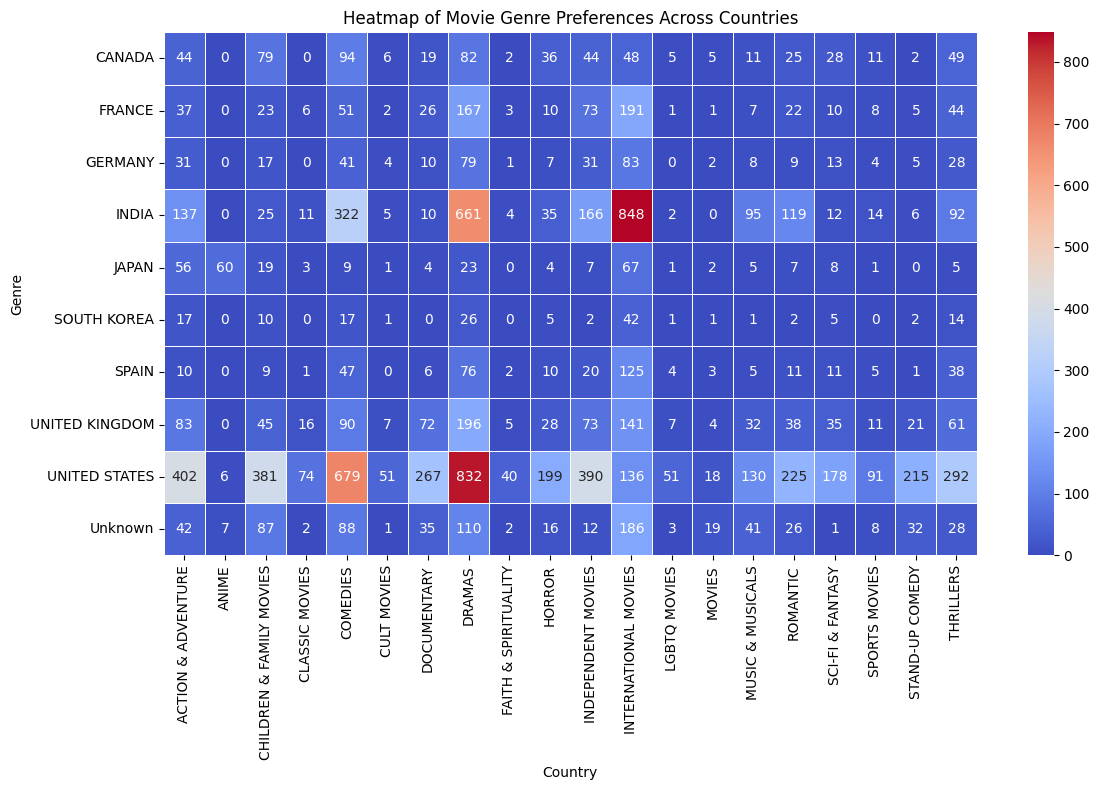

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(data=pd.crosstab(df10_genre_movie['country'],df10_genre_movie['listed_in']),cmap='coolwarm', annot=True, fmt='.0f', linewidths=0.5)

# Customize the plot
plt.title('Heatmap of Movie Genre Preferences Across Countries')
plt.xlabel('Country')
plt.ylabel('Genre')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
pd.crosstab(df10__genre_tv_show['country'],df10__genre_tv_show['listed_in'])

listed_in,ACTION & ADVENTURE,ANIME,BRITISH TV SHOWS,CLASSIC & CULT TV,COMEDIES,CRIME TV SHOWS,DOCUMENTARY,DRAMAS,HORROR,INTERNATIONAL TV SHOWS,...,REALITY TV,ROMANTIC,SCI-FI & FANTASY,SCIENCE & NATURE TV,SPANISH-LANGUAGE TV SHOWS,STAND-UP COMEDY & TALK SHOWS,TEEN TV SHOWS,THRILLERS,TV MYSTERIES,TV SHOWS
country,,,,,,,,,,,,,,,,,,,,,
CANADA,11,2,3,4,30,14,8,31,8,22,...,6,2,8,3,0,0,2,5,8,0
FRANCE,6,0,2,0,20,19,1,27,3,37,...,2,1,1,0,0,1,0,3,1,0
GERMANY,2,0,6,0,5,13,3,19,0,30,...,3,1,1,1,0,1,0,0,2,0
INDIA,5,0,2,0,25,9,1,26,5,52,...,2,10,3,0,0,3,1,1,2,2
JAPAN,5,139,1,0,10,15,1,20,5,148,...,9,21,0,0,0,1,14,6,4,1
SOUTH KOREA,9,0,0,0,19,24,0,38,3,152,...,4,77,0,0,0,4,0,1,3,0
SPAIN,4,1,5,0,5,22,2,11,0,48,...,3,9,0,1,40,0,1,0,0,0
UNITED KINGDOM,9,0,193,7,42,40,63,34,2,109,...,24,11,4,20,1,1,0,2,2,0
UNITED STATES,92,18,21,15,245,103,84,230,36,60,...,80,41,57,31,23,28,31,26,47,1


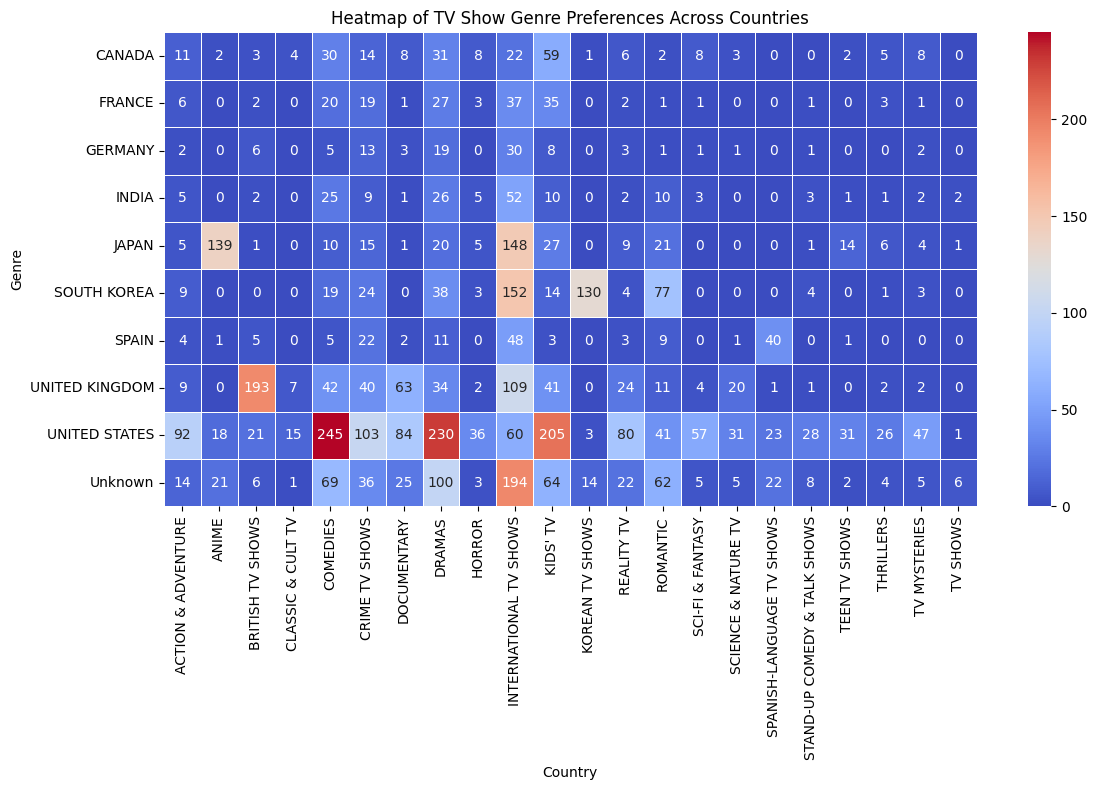

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(data=pd.crosstab(df10__genre_tv_show['country'],df10__genre_tv_show['listed_in']),cmap='coolwarm', annot=True, fmt='.0f', linewidths=0.5)

# Customize the plot
plt.title('Heatmap of TV Show Genre Preferences Across Countries')
plt.xlabel('Country')
plt.ylabel('Genre')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

 **Analysis and Insights from Netflix Genre Data**

 **1. Overall Genre Distribution**
- **Dramas (2,788 titles)** dominate the content catalog, making them the most prevalent genre on Netflix.
- **Comedies (1,908 titles)** and **International Movies (1,867 titles)** also form a significant portion of the catalog.
- **Action & Adventure (1,016 titles)** is another strong genre, indicating a high demand for dynamic and engaging content.
- **International TV Shows (852 titles)** and **Independent Movies (818 titles)** show a diverse range of content catered to global audiences.
- Less represented genres include **Teen TV Shows (51 titles)** and **Classic & Cult TV (27 titles),** indicating a niche audience for these types of content.

**2. Movie Genre Preferences Across Countries**
- **United States:** Dramas (832), Comedies (679), and Documentaries (267) are the most popular genres, reflecting a broad preference for storytelling and factual content.
- **India:** Dramas (848) overwhelmingly dominate, followed by Documentaries (661) and Romantic movies (322), indicating a preference for emotionally engaging narratives.
- **United Kingdom:** Documentaries (196) and Dramas (141) are significant, showing interest in informative and dramatic storytelling.
- **Japan:** Anime (60) and Dramas (67) have notable representation, which aligns with the country's strong anime culture.
- **South Korea:** International Movies (152) and Korean TV Shows (152) highlight the strength of the Korean entertainment industry.

**3. TV Show Genre Preferences Across Countries**
- **United States:** Crime TV Shows (245) and International TV Shows (205) dominate, suggesting a preference for crime-based narratives and global content.
- **United Kingdom:** British TV Shows (193) are the most prominent, reinforcing the cultural impact of British television.
- **Japan:** Anime (139) leads, confirming its dominant role in Japanese entertainment.
- **South Korea:** Korean TV Shows (152) are unsurprisingly the most watched, reflecting the country's strong content production.
- **India:** International TV Shows (52) lead, suggesting that audiences in India consume a diverse range of content.

**4. Business Recommendations for Netflix**
- **Content Investment Based on Country-Specific Preferences:**
  - **Expand Drama and Comedy Productions Globally:** These genres have high engagement across multiple regions.
  - **Increase Anime and Korean TV Show Offerings:** Japan and South Korea have strong preferences for these categories.
  - **Continue Investing in International TV Shows:** This genre is highly popular across different regions.

- **Targeted Marketing Strategies:**
  - **Highlight Crime and Documentary Content in the U.S. and U.K.** to cater to the audience's strong preference for factual and investigative storytelling.
  - **Promote Romantic and Drama-Based Content in India**, where emotional storytelling plays a key role in audience engagement.

- **Niche Genre Expansion:**
  - **Increase investments in Sci-Fi & Fantasy, Horror, and Thrillers**, as these genres show strong secondary demand.
  - **Explore opportunities in Reality TV and Stand-Up Comedy & Talk Shows**, which have limited representation but may grow with the right strategy.

**Conclusion**
Netflix's genre distribution shows strong global and country-specific patterns. Investing in regionally preferred genres while maintaining a strong catalog of global hits will help Netflix expand its market reach and increase user engagement.